# Visualization and further exploration

In this notebook, we seek to understand the behaviour of two solar power plants through the data generated by the photovoltaic modules. To do so, we will talk about:

1. **Reminder on photovoltaic systems or PV systems**
2. **EDA on:**
    - ***DC and AC power***
    - ***Irradiation***
    - ***ambient and module temperature***
    - ***yield***
3. **Correlation of all features**
4. **Comparison of two power plants** 

## Reminder on PV systems

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/a/a0/From_a_solar_cell_to_a_PV_system.svg" width="450"><br/>
</center>


**``PV system``** is a power system designed to supply usable solar power by means of photovoltaics.


**``PV Cell``** is an electrical device that converts the energy of light directly into electricity by the photovoltaic effect, which is a physical and chemical phenomenon. It is also the basics photovoltaic device that is the building block PV modules.

**``Photovoltaic effect``**  is the generation of voltage and electric current in a material upon exposure to light.

**``PV module``** is a group of PV cell connected in serie and/or parallel and encapsulated in an environmentally protective laminate.

**``PV panel``** is a group of modules that is the basic building block of a PV array.

**``PV array``** is a group of panels that comprises the complete PV generating unit.

### PV inverter

<center>
<img src="https://www.futuregenerationenergy.ie/wp-content/uploads/2017/03/santnu_new.jpg" width="450"><br/>
</center>

**``PV inverter``** convert battery or PV array DC power to AC power for use with conventional utility-powered appliances. It is heart of PV systems because PV array is a DC source, an inverter is required to convert the dc power to normal ac power that is used in our homes and offices.

PV systems are very influenced by weather condition, if the weather is good, we get a maximun yield but if the weather is bad, we get a minimun yield. That is why there is important to know how weather condition can impact on yield of the two solar power plants.

**Source**
- [Photovoltaic(PV) Tutorial](http://web.mit.edu/taalebi/www/scitech/pvtutorial.pdf)

- [PV Inverter](https://www.futuregenerationenergy.ie/domestic/solar-pv-inverters/)

- [PV Systems](https://en.wikipedia.org/wiki/Photovoltaic_system)


According to the notion of PV systems, the important feature are:

- *DC power*

- *AC power*

- *Yield*

- *ambiant Temperature*

- *module temperature*

- *irradiation*

Okay, let's go to the next section.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
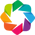

In [2]:
#import all package needed
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import normaltest
import holoviews as hv
from holoviews import opts
import cufflinks as cf
hv.extension('bokeh')

In [3]:
cf.set_config_file(offline = True)
sns.set(style="whitegrid")

## Plant I: Solar Power Generation data

Plant contains 22 inverters where each inverter are connected with several PV array. Every 15 min, each inverter records his data. So, if we want to know how many the plant has produced a power in a hour, we just compute the contribution of 22 inverters. 

In [4]:
#we take file for plant 1 Generation data
file = '/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv'

In [5]:
plant1_data = pd.read_csv(file) # load data

In [6]:
plant1_data.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0

In [7]:
print('The number of inverter for data_time {} is {}'.format('15-05-2020 23:00', plant1_data[plant1_data.DATE_TIME == '15-05-2020 23:00']['SOURCE_KEY'].nunique()))

The number of inverter for data_time 15-05-2020 23:00 is 22


In [8]:
plant1_data.info() # we check if there exist missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [9]:
#we compute a sum of 22 inverters
plant1_data = plant1_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')

In [10]:
plant1_data = plant1_data.reset_index()

In [11]:
plant1_data.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD
0  01-06-2020 00:00       0.0       0.0      5407.25  153519480.0
1  01-06-2020 00:15       0.0       0.0         0.00  153519480.0
2  01-06-2020 00:30       0.0       0.0         0.00  153519480.0
3  01-06-2020 00:45       0.0       0.0         0.00  153519480.0
4  01-06-2020 01:00       0.0       0.0         0.00  153519480.0

**``Cleaning data``**

I convert ``DATE_TIME`` object type to datetime type. After I separate ``DATE_TIME`` to **date** and **time**

In [12]:
plant1_data['DATE_TIME'] = pd.to_datetime(plant1_data['DATE_TIME'], errors='coerce')

In [13]:
plant1_data['time'] = plant1_data['DATE_TIME'].dt.time
plant1_data['date'] = pd.to_datetime(plant1_data['DATE_TIME'].dt.date)

In [14]:
plant1_data.shape # our data reduced very well

(3158, 7)

In [15]:
#we check
plant1_data.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD      time  \
0 2020-01-06 00:00:00       0.0       0.0      5407.25  153519480.0  00:00:00   
1 2020-01-06 00:15:00       0.0       0.0         0.00  153519480.0  00:15:00   
2 2020-01-06 00:30:00       0.0       0.0         0.00  153519480.0  00:30:00   
3 2020-01-06 00:45:00       0.0       0.0         0.00  153519480.0  00:45:00   
4 2020-01-06 01:00:00       0.0       0.0         0.00  153519480.0  01:00:00   

        date  
0 2020-01-06  
1 2020-01-06  
2 2020-01-06  
3 2020-01-06  
4 2020-01-06

In [16]:
plant1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
 5   time         3158 non-null   object        
 6   date         3158 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 172.8+ KB


### EDA for ``DC power``, ``AC power`` and ``Yield``.

Here, we use

1. Line or scatter plot

2. change rate.

3. Box and Whisker plot

4. calendar plot

5. Bar chart.

## **``DC Power``**

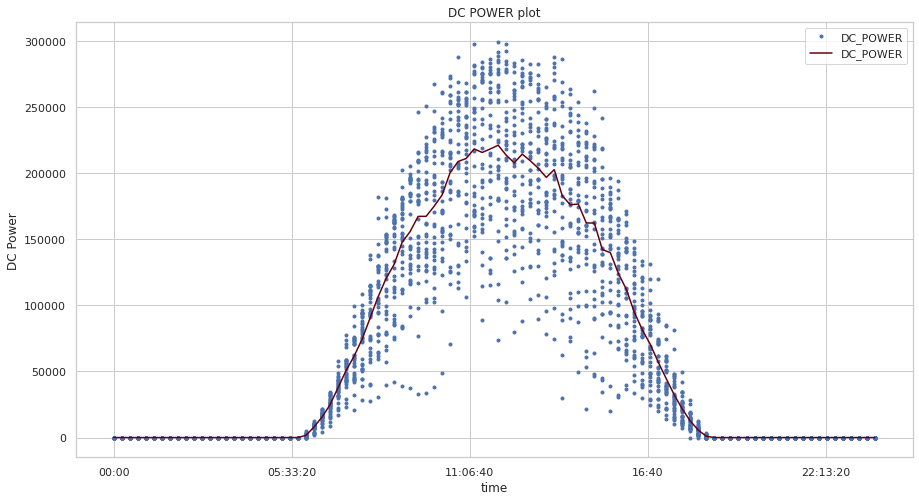

In [17]:
#plant1_data.iplot(x= 'time', y='DC_POWER', xTitle='Time',  yTitle= 'DC Power', title='DC POWER plot')
plant1_data.plot(x= 'time', y='DC_POWER', style='.', figsize = (15, 8))
plant1_data.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

Between 05:33:20 and 18:00:00, the Plant produces a dc power but otherwise there is null. The reason is sunlight. 

In [18]:
#Okay, we are going to see dc power in each day produced by Plant.
#we create calendar_dc data how in each day Plant produce a dc power in each time.

calendar_dc = plant1_data.pivot_table(values='DC_POWER', index='time', columns='date')

In [19]:
calendar_dc.tail()

date      2020-01-06  2020-02-06  2020-03-06  2020-04-06  2020-05-06  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  ...  \
time                                                                  ...   
22:45:00         0.0         0.0         0.0         0.0         0.0  ...   
23:00:00         0.0         0.0         0.0         0.0         0.0  ...   
23:15:00         NaN         0.0         0.0         0.0         0.0  ...   
23:30:00         NaN         0.0         0.0         0.0         0.0  ...   
23:45:00         NaN         0.0         0.0         0.0         0.0  ...   

date      2020-06-14  2020-06-15  2020-06-16  2020-06-17  2020-07-06  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-08-06  2020-09-06  2020-10-06  2020-11-06  2020-12-06  
time                                                                  
22:45:00         0.0         0.0         0.0         0.0         0.0  
23:00:00         0.0         0.0         0.0         0.0         0.0  
23:15:00         0.0         0.0         0.0         0.0         0.0  
23:30:00         0.0         0.0         0.0         0.0         0.0  
23:45:00         0.0         0.0         0.0         0.0         0.0  

[5 rows x 34 columns]

In [20]:
# define function to multi plot

def multi_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,20)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, style = 'k.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

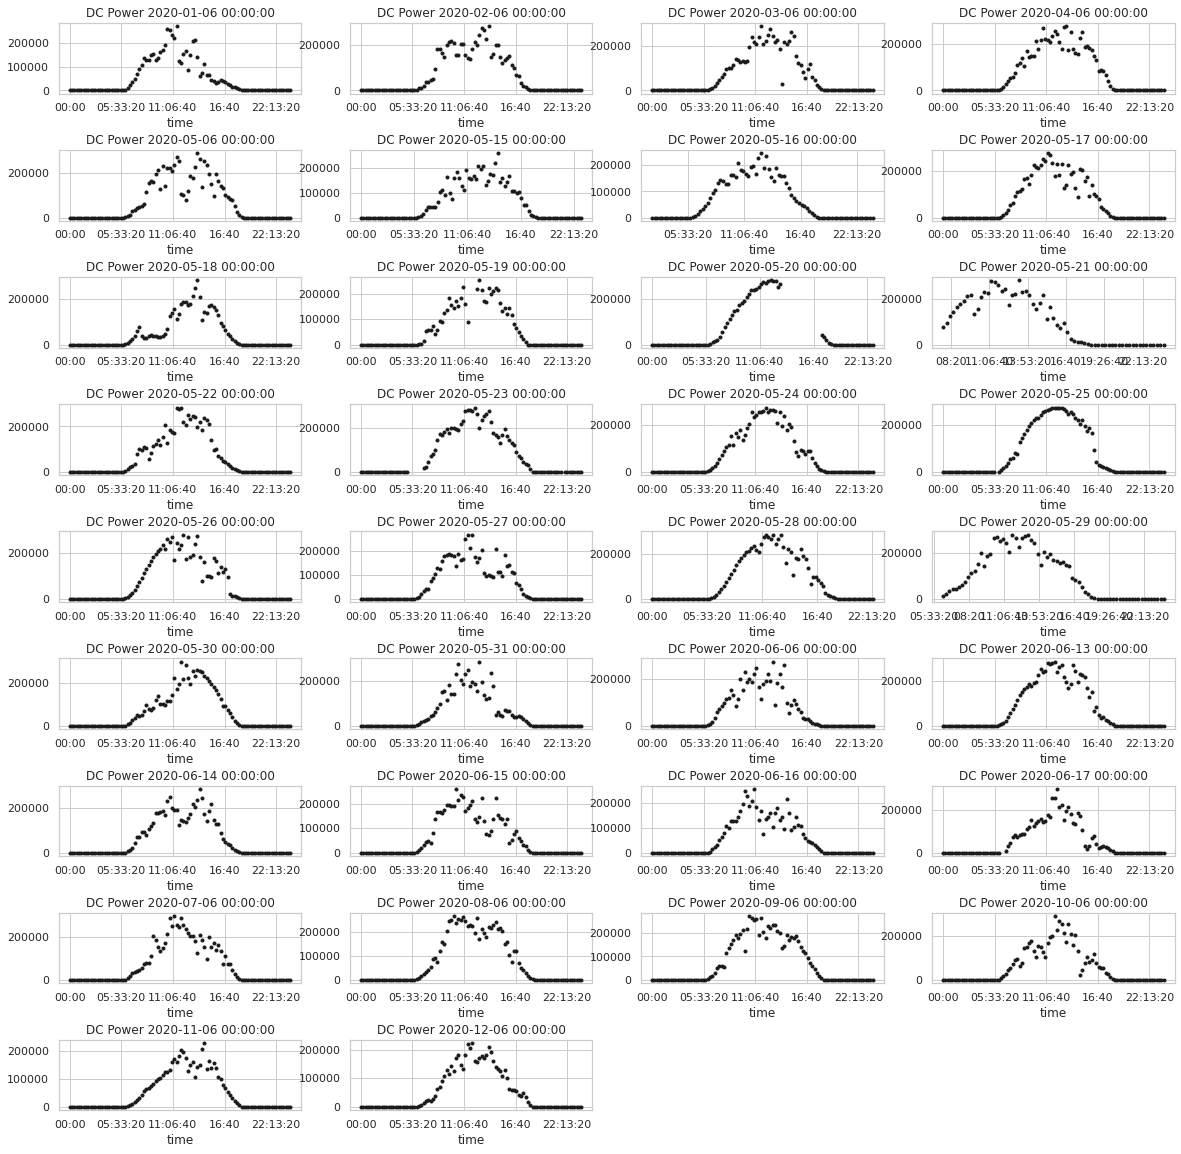

In [21]:
multi_plot(data=calendar_dc, row=9, col=4)

Almost all the curves are the same despite some fluctuation between 11 am and 2 pm. except the curve of May 20 and 25 which gives a uniform shape.

In [22]:
daily_dc = plant1_data.groupby('date')['DC_POWER'].agg('sum')

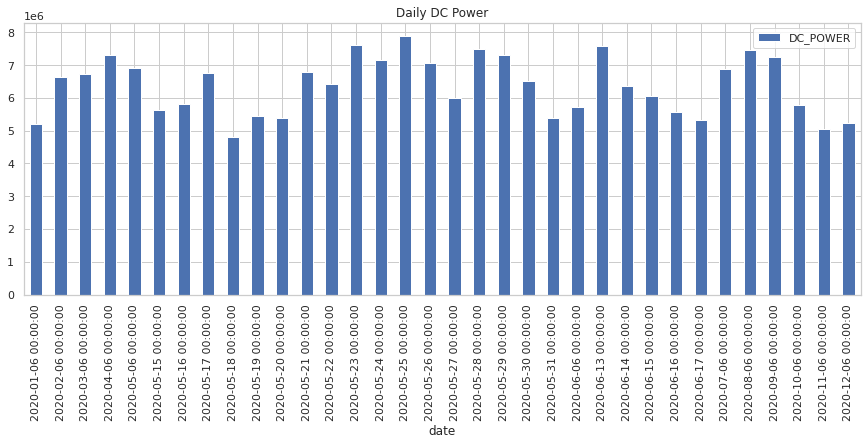

In [23]:
daily_dc.plot.bar(figsize=(15,5), legend=True)
plt.title('Daily DC Power')
plt.show()

Only **``2020-05-25``** dc power is maximun.

## **``Daily Yield``**

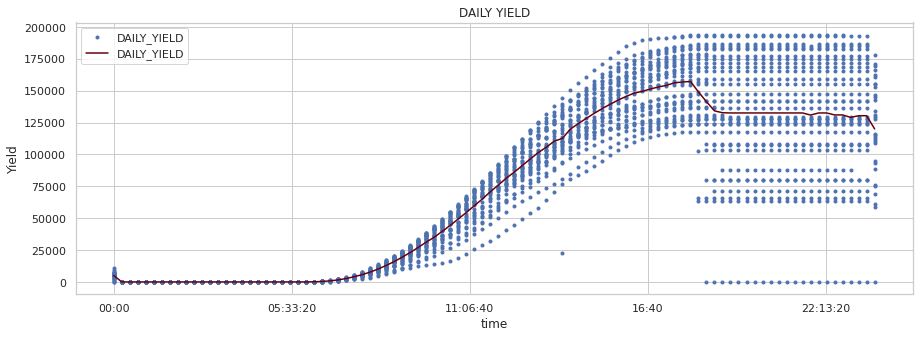

In [24]:
plant1_data.plot(x='time', y='DAILY_YIELD', style='b.', figsize=(15,5))
plant1_data.groupby('time')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('DAILY YIELD')
plt.ylabel('Yield')
plt.show()

data gives us a logistics-like function but after ``18:00`` the energy decrease slowly; suddenly at ``00:00`` breakdown.

In [25]:
#pivot table data
daily_yield = plant1_data.pivot_table(values='DAILY_YIELD', index='time', columns='date')

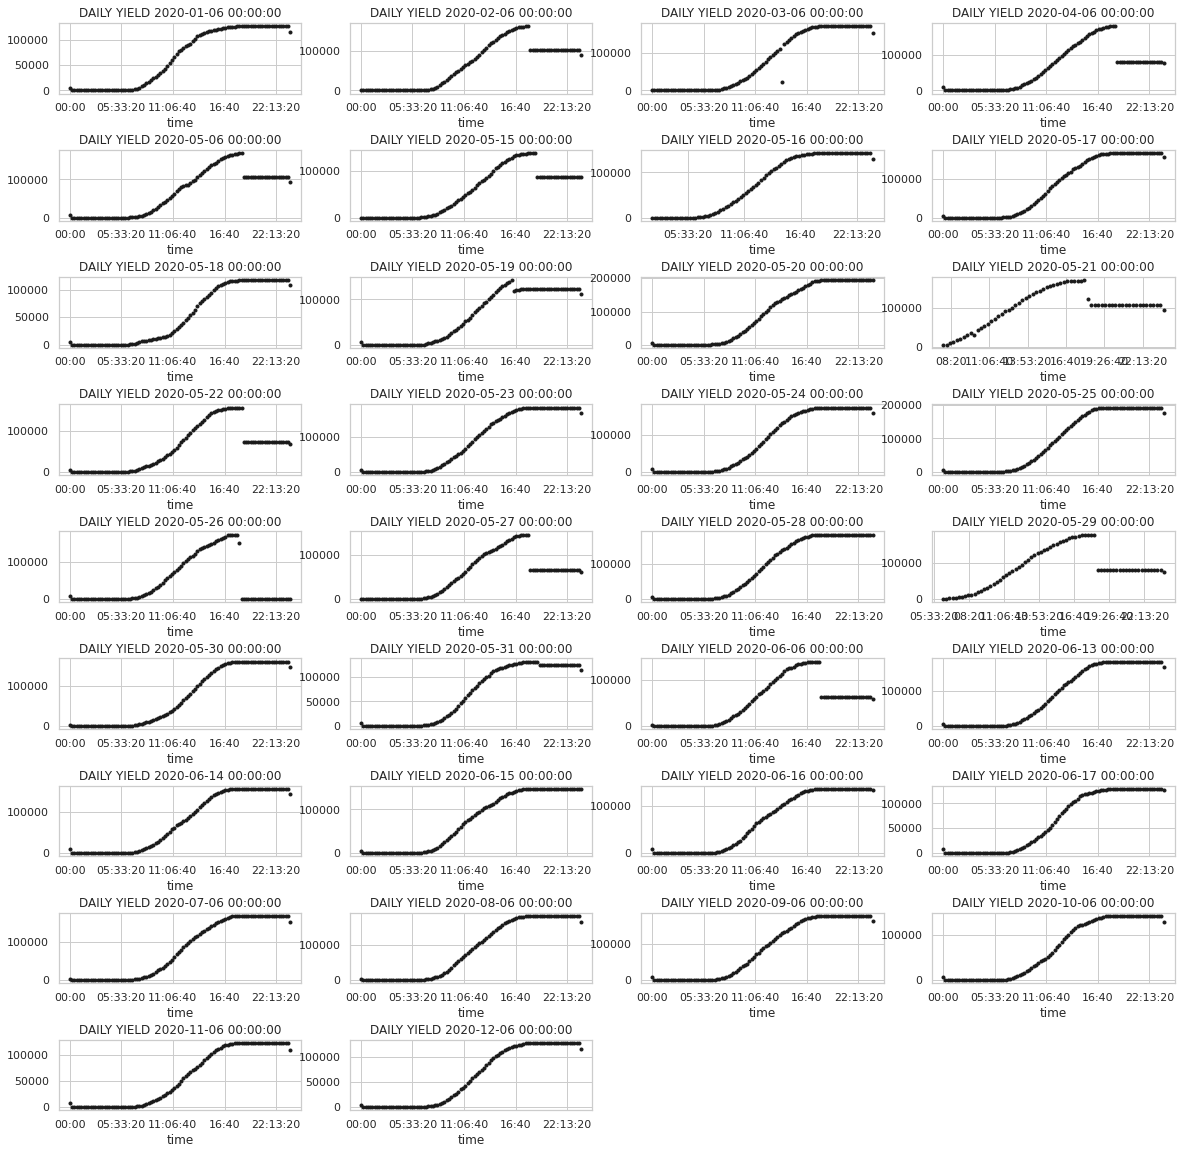

In [26]:
# we plot all daily yield
multi_plot(data=daily_yield.interpolate(), row=9, col=4, title='DAILY YIELD')

As we can see some daily_yield date (``2020-02-06``, ``2020-05-19``,...) have a logistic shape  with missing values but others have not.

Every 15 min data is recorded. After 15 min, we get a **new yield**. To compute this new yield it is just this formula:

``new yield = next yield - previous yield``. It is a difference equation that ``.diff()`` pandas function can help us to compute it.

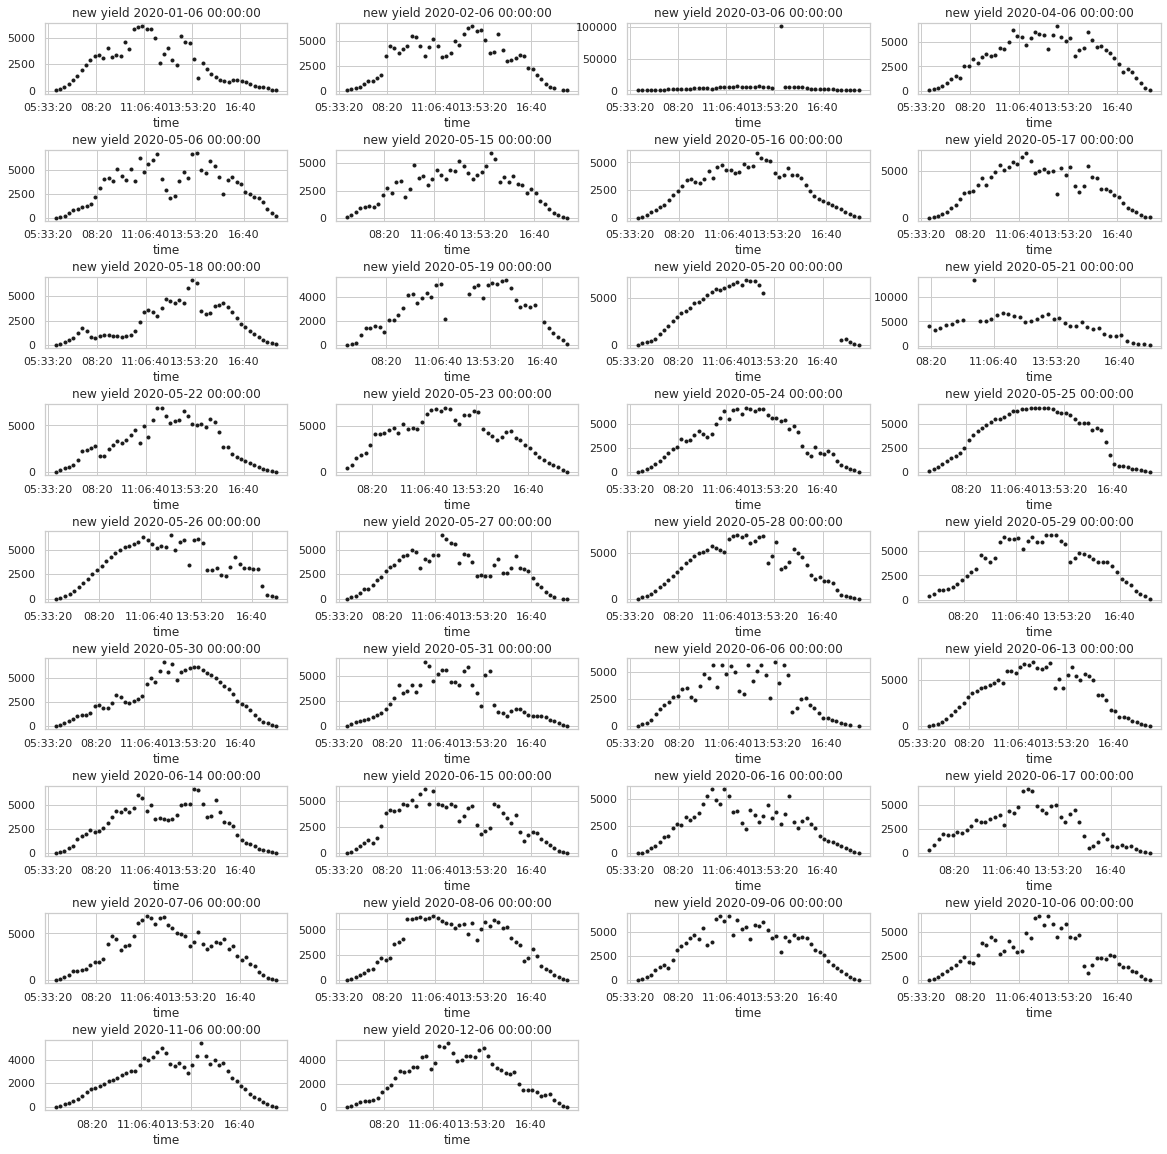

In [27]:
#plotting a change rate daily yield over time
multi_plot(data=daily_yield.diff()[daily_yield.diff()>0], row=9, col=4, title='new yield')

Between ``08:20`` and ``16:40``, we obtain each 15min, **$new yield > 2500$** with fluctuation.

**Daily Yield each day**

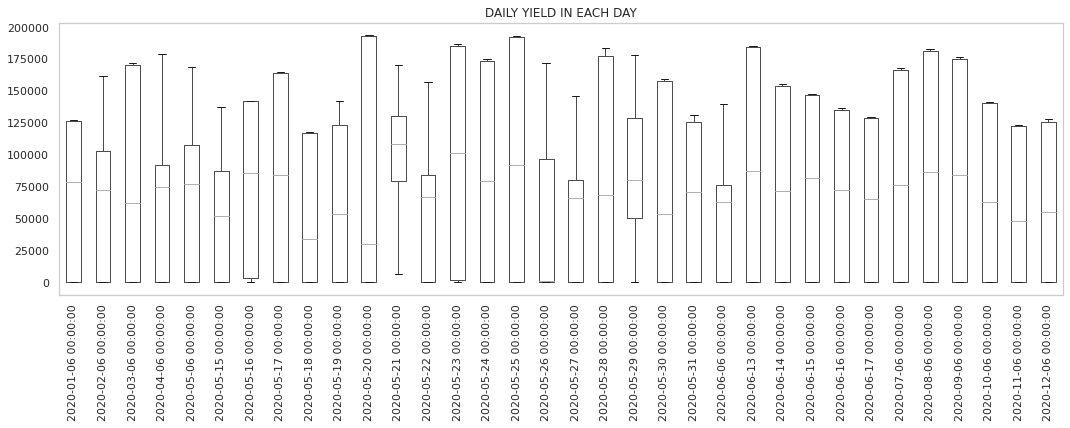

In [28]:
daily_yield.boxplot(figsize=(18,5), rot=90, grid=False)
plt.title('DAILY YIELD IN EACH DAY')
plt.show()

For each day, the daily yield change. some day is high. The observation of all boxes is good, outlier does not exist. 

For further details see
Wikipedia's entry for [``boxplot``](<https://en.wikipedia.org/wiki/Box_plot>).

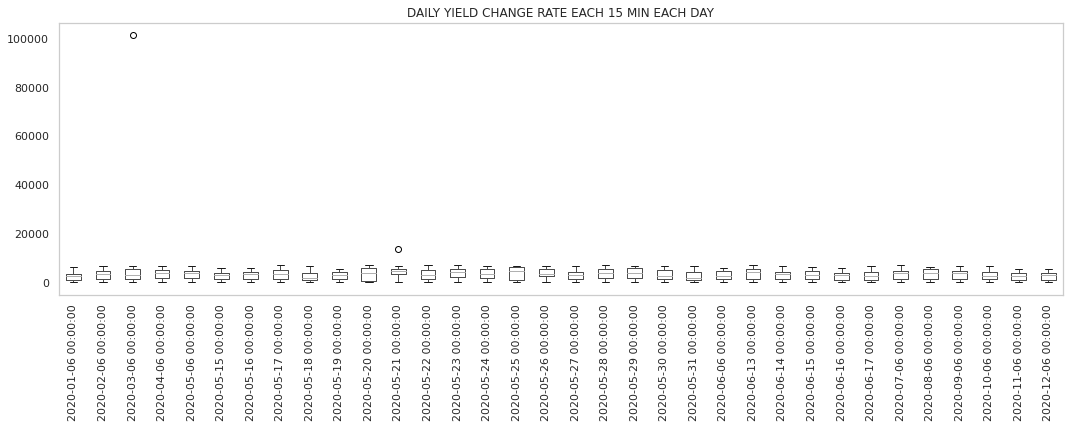

In [29]:
daily_yield.diff()[daily_yield.diff()>0].boxplot(figsize=(18,5), rot=90, grid=False)
plt.title('DAILY YIELD CHANGE RATE EACH 15 MIN EACH DAY')
plt.show()

Only two days have an outlier **2020-03-06** and **2020-05-21**. 

In [30]:
#we compute a daily yield for each date.
dyield = plant1_data.groupby('date')['DAILY_YIELD'].agg('sum')

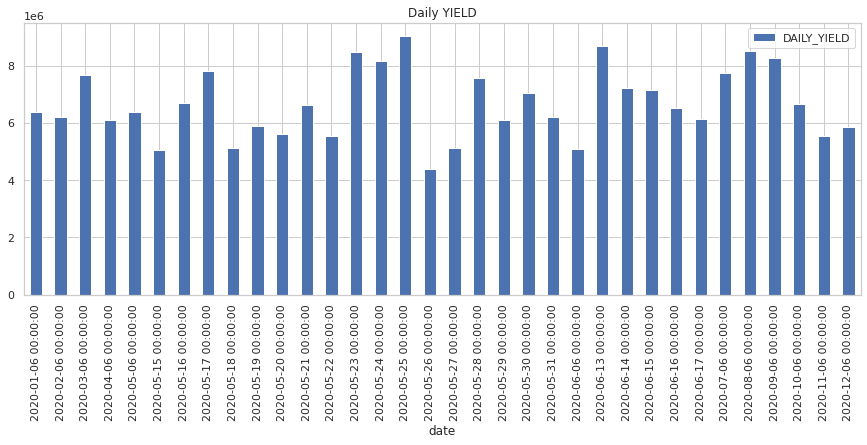

In [31]:
dyield.plot.bar(figsize=(15,5), legend=True)
plt.title('Daily YIELD')
plt.show()

## Plant_1: Weather Sensor Data

In [32]:
file1 = '/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv'

In [33]:
plant1_sensor = pd.read_csv(file1)

In [34]:
plant1_sensor.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [35]:
plant1_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [36]:
plant1_sensor['DATE_TIME'] = pd.to_datetime(plant1_sensor['DATE_TIME'], errors='coerce')

In [37]:
# same work cleaning data
plant1_sensor['date'] = pd.to_datetime(pd.to_datetime(plant1_sensor['DATE_TIME']).dt.date)
plant1_sensor['time'] = pd.to_datetime(plant1_sensor['DATE_TIME']).dt.time


del plant1_sensor['PLANT_ID']
del plant1_sensor['SOURCE_KEY']

In [38]:
plant1_sensor.tail()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
3177 2020-06-17 22:45:00            22.150570           21.480377   
3178 2020-06-17 23:00:00            22.129816           21.389024   
3179 2020-06-17 23:15:00            22.008275           20.709211   
3180 2020-06-17 23:30:00            21.969495           20.734963   
3181 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION       date      time  
3177          0.0 2020-06-17  22:45:00  
3178          0.0 2020-06-17  23:00:00  
3179          0.0 2020-06-17  23:15:00  
3180          0.0 2020-06-17  23:30:00  
3181          0.0 2020-06-17  23:45:00

### EDA for   ``Ambient Temperature``, ``Module Temperature`` and ``Irradiation``

Here, we do

1. Line or scatter plot

2. %change.

3. Box and Whisker plot

4. calendar plot

5. Bar chart.

6. Lag plot

### ``Ambient Temperature``

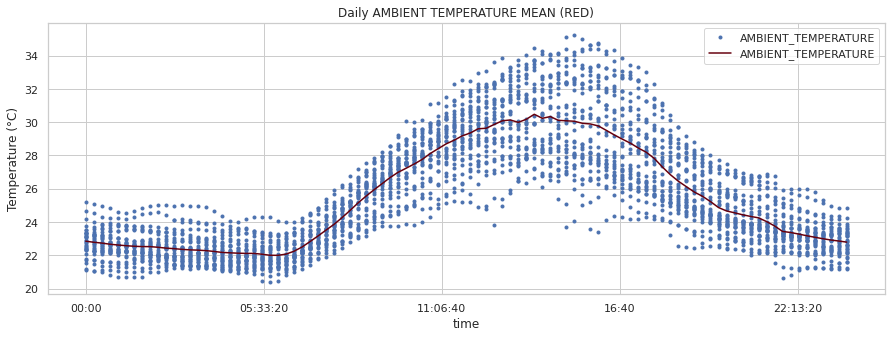

In [39]:
plant1_sensor.plot(x='time', y = 'AMBIENT_TEMPERATURE' , style='b.', figsize=(15,5))
plant1_sensor.groupby('time')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

In [40]:
ambient = plant1_sensor.pivot_table(values='AMBIENT_TEMPERATURE', index='time', columns='date')

In [41]:
ambient.tail()

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
22:45:00   22.057080   24.492981   21.315892   22.815780   23.393146   
23:00:00   22.236018   24.461625   21.220532   22.787469   23.230817   
23:15:00         NaN   24.392568   21.216575   22.856671   22.916650   
23:30:00         NaN   24.378021   21.273112   22.750576   22.787917   
23:45:00         NaN   24.249347   21.209418   22.621004   22.638493   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
22:45:00   24.003129   24.002574   23.214526   25.338855   24.403691  ...   
23:00:00   23.830852   23.978326   22.361055   25.133763   24.308990  ...   
23:15:00   23.701162   23.922381   21.641128   24.969698   24.175543  ...   
23:30:00   23.589626   23.892236   21.564903   24.838093   24.169597  ...   
23:45:00   23.569009   23.856805   21.605520   24.818829   23.777932  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
22:45:00   23.170805   22.946915   22.014016   23.419015   22.599839   
23:00:00   23.115568   22.883195   22.087756   23.328575   22.504606   
23:15:00   22.929185   22.892314   22.247858   23.195113   22.398564   
23:30:00   22.616367   22.866815   22.409064   23.027635   22.145038   
23:45:00   22.369204   22.825907   22.643738   22.883351   21.820540   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
22:45:00   22.265993   23.522461   23.612832   22.872359   22.150570  
23:00:00   22.227169   23.386562   23.618848   22.962205   22.129816  
23:15:00   22.334206   23.331081   23.602976   22.947974   22.008275  
23:30:00   22.237394   23.444953   23.631051   22.925033   21.969495  
23:45:00   22.205029   23.418154   23.641211   22.892004   21.909288  

[5 rows x 34 columns]

Text(0, 0.5, 'Temperature (°C)')

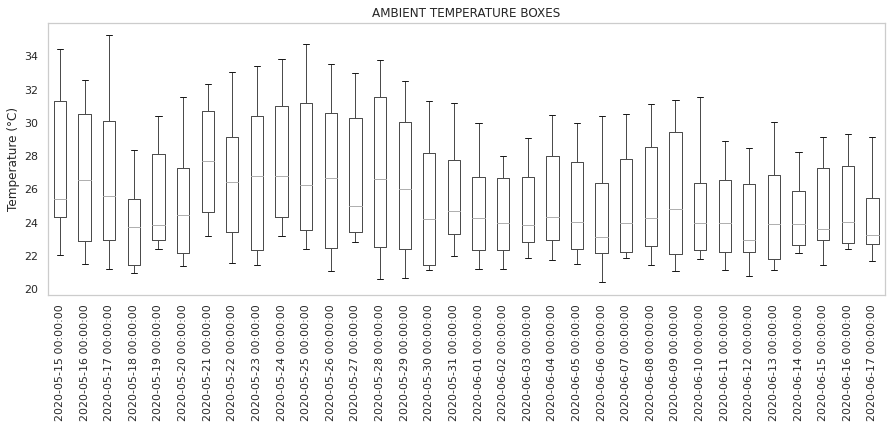

In [42]:
ambient.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('AMBIENT TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

**Which date ambient temperature mean is maximun?**

In [43]:
am_temp = plant1_sensor.groupby('date')['AMBIENT_TEMPERATURE'].agg('mean')

Text(0, 0.5, 'Temperature (°C)')

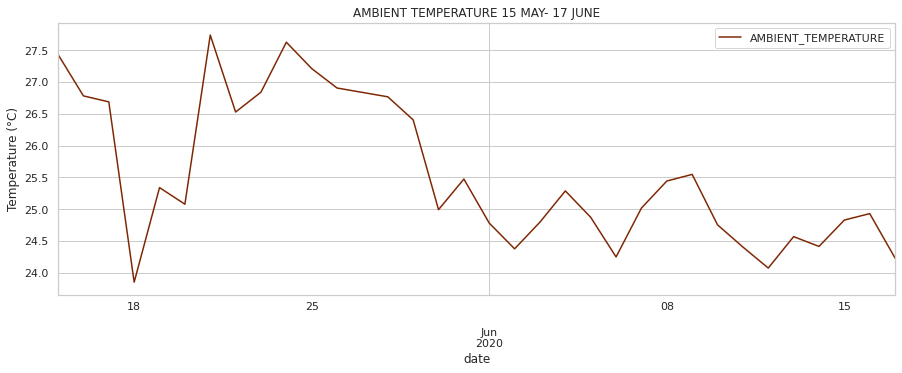

In [44]:
am_temp.plot(grid=True, figsize=(15,5), legend=True, colormap='Oranges_r')
plt.title('AMBIENT TEMPERATURE 15 MAY- 17 JUNE')
plt.ylabel('Temperature (°C)')

**Comment**:

In May, ambiant Temperature in Plant 1 was between 24 and 30°C, this means that May was very hot. But in June ambiant Temperature decreases considerately between 24 and 26°C.

In the next cell, we will seek how % change of ambient Temperature is.

In [45]:
am_change_temp = (am_temp.diff()/am_temp)*100

Text(0.5, 1.0, 'AMBIENT TEMPERATURE %change')

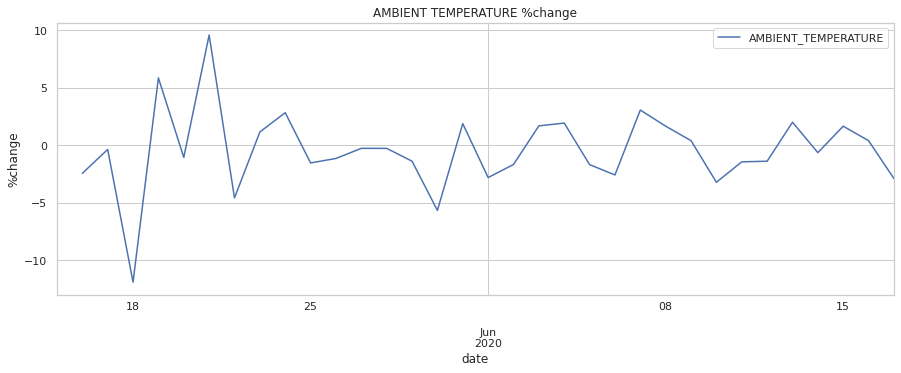

In [46]:
am_change_temp.plot(figsize=(15,5), grid=True, legend=True)
plt.ylabel('%change')
plt.title('AMBIENT TEMPERATURE %change')

**Comment**

1. Sunday 17 May 2020 to Monday 18 May 2020, the ambient Temperature decreases to 10%.

2. Monday 18 May 2020 to Tuesday 19 May 2020, the ambient Temperature increases to 15% and tomorrow decreases to 5%.

3. Wednesday 20 May 2020 to Thursday 21 May 2020, the ambient Temperature increases to 10% and tomorrow decreases to 15%.

4. June month's, the ambiant Temperature %change stabilize between -2.5 and 2.5%. 

## Ambient Temperature: seasonal, trend and residual.

In [47]:
from scipy.signal import periodogram

In [48]:
decomp = sm.tsa.seasonal_decompose(am_temp)

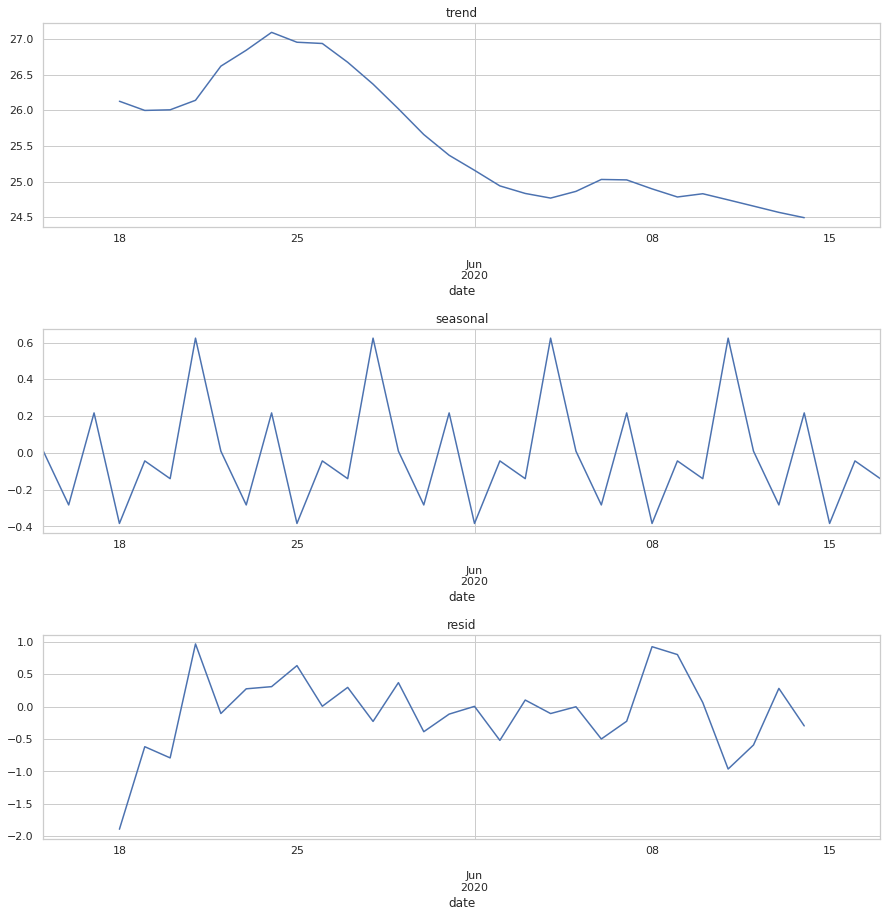

In [49]:
cols = ['trend', 'seasonal', 'resid'] # take all column
data = [decomp.trend, decomp.seasonal, decomp.resid]
gp = plt.figure(figsize=(15,15)) 
    
gp.subplots_adjust(hspace=0.5)
for i in range(1, len(cols)+1):
    ax = gp.add_subplot(3,1, i)
    data[i-1].plot(ax=ax)
    ax.set_title('{}'.format(cols[i-1]))

**Comment**

seasonality of ambient Temperature is the **7 days** to see a maximun of temperature.  

### ``Module Temperature``

Text(0, 0.5, 'Temperature(°C)')

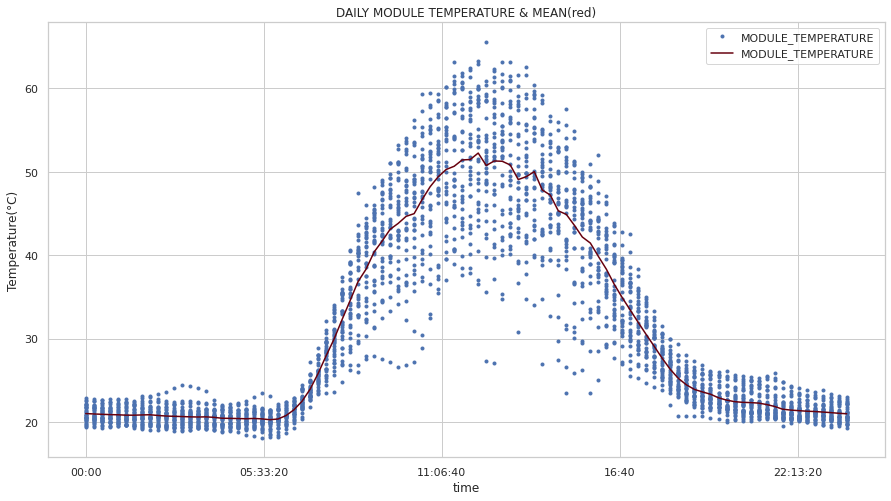

In [50]:
plant1_sensor.plot(x='time', y='MODULE_TEMPERATURE', figsize=(15,8), style='b.')
plant1_sensor.groupby('time')['MODULE_TEMPERATURE'].agg('mean').plot(colormap='Reds_r', legend=True)
plt.title('DAILY MODULE TEMPERATURE & MEAN(red)')
plt.ylabel('Temperature(°C)')

In [51]:
module_temp = plant1_sensor.pivot_table(values='MODULE_TEMPERATURE', index='time', columns='date')

Text(0, 0.5, 'Temperature (°C)')

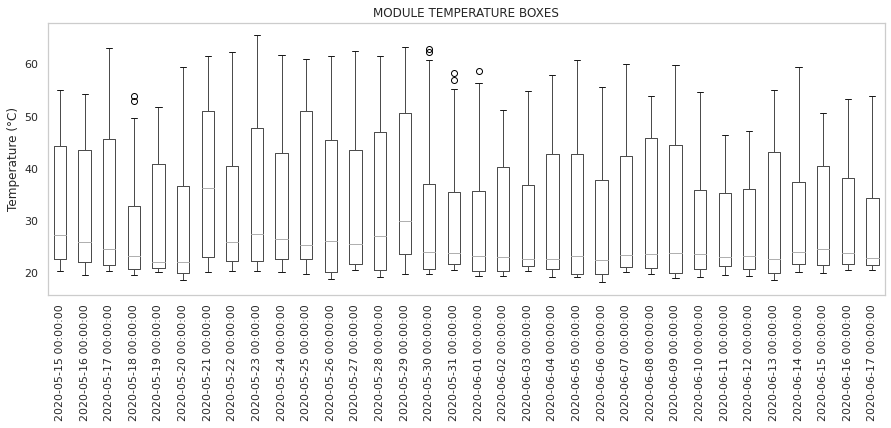

In [52]:
module_temp.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('MODULE TEMPERATURE BOXES')
plt.ylabel('Temperature (°C)')

**Comment**

Four dates contains outliers: **18-05-2020, 30-05-2020, 31-05-2020, 01-06-2020**. The outlier of these 3 dates occurs precisely at interval time $[11:06:40, 16:40]$. see

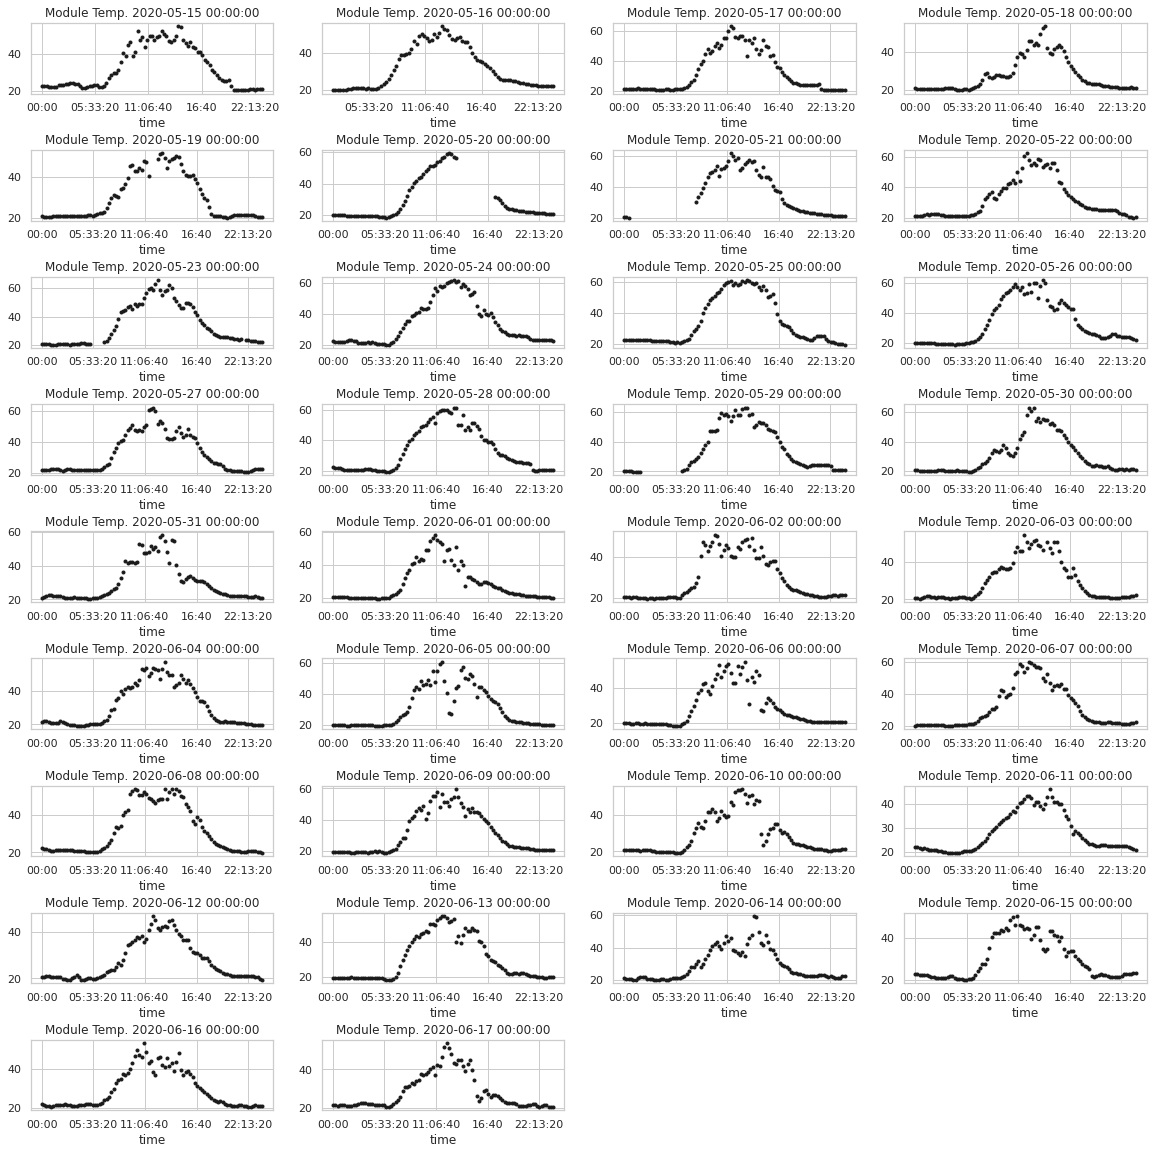

In [53]:
multi_plot(module_temp, row=9,  col=4, title='Module Temp.')

In [54]:
#we can also see also calendar plot
mod_temp = plant1_sensor.groupby('date')['MODULE_TEMPERATURE'].agg('mean')

Text(0, 0.5, 'Temperature (°C)')

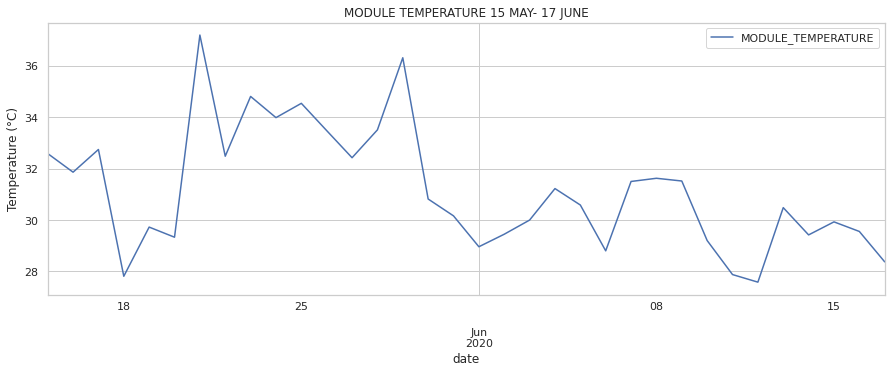

In [55]:
mod_temp.plot(grid=True, figsize=(15,5), legend=True)
plt.title('MODULE TEMPERATURE 15 MAY- 17 JUNE')
plt.ylabel('Temperature (°C)')

**Comment**

May month's have: 2 huges hot date 21 and 29. 

In [56]:
#we plot a %change of MODULE TEMPERATURE.
chan_mod_temp = (mod_temp.diff()/mod_temp)*100

Text(0.5, 1.0, 'MODULE TEMPERATURE %change')

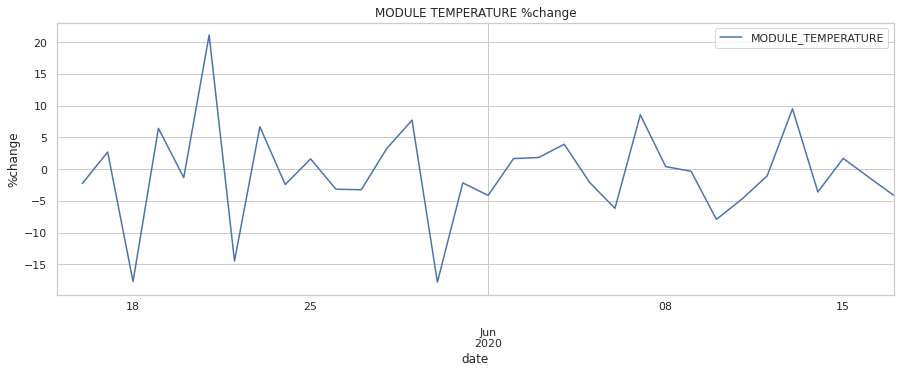

In [57]:
chan_mod_temp.plot(grid=True, legend=True, figsize=(15,5))
plt.ylabel('%change')
plt.title('MODULE TEMPERATURE %change')

### ``Irradiation``

Text(0.5, 1.0, 'IRRADIATION')

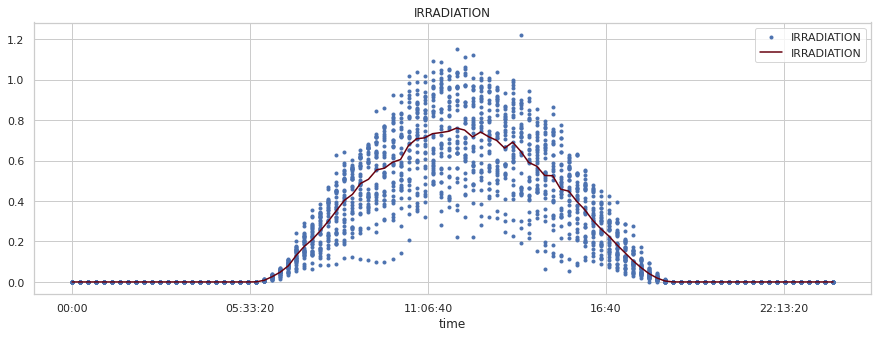

In [58]:
plant1_sensor.plot(x='time', y = 'IRRADIATION', style='.', legend=True, figsize=(15,5))
plant1_sensor.groupby('time')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('IRRADIATION')

In [59]:
irra = plant1_sensor.pivot_table(values='IRRADIATION', index='time', columns='date')

In [60]:
irra.tail()

date      2020-05-15  2020-05-16  2020-05-17  2020-05-18  2020-05-19  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         NaN         0.0         0.0         0.0         0.0   
23:30:00         NaN         0.0         0.0         0.0         0.0   
23:45:00         NaN         0.0         0.0         0.0         0.0   

date      2020-05-20  2020-05-21  2020-05-22  2020-05-23  2020-05-24  ...  \
time                                                                  ...   
22:45:00         0.0         0.0         0.0         0.0         0.0  ...   
23:00:00         0.0         0.0         0.0         0.0         0.0  ...   
23:15:00         0.0         0.0         0.0         0.0         0.0  ...   
23:30:00         0.0         0.0         0.0         0.0         0.0  ...   
23:45:00         0.0         0.0         0.0         0.0         0.0  ...   

date      2020-06-08  2020-06-09  2020-06-10  2020-06-11  2020-06-12  \
time                                                                   
22:45:00         0.0         0.0         0.0         0.0         0.0   
23:00:00         0.0         0.0         0.0         0.0         0.0   
23:15:00         0.0         0.0         0.0         0.0         0.0   
23:30:00         0.0         0.0         0.0         0.0         0.0   
23:45:00         0.0         0.0         0.0         0.0         0.0   

date      2020-06-13  2020-06-14  2020-06-15  2020-06-16  2020-06-17  
time                                                                  
22:45:00         0.0         0.0         0.0         0.0         0.0  
23:00:00         0.0         0.0         0.0         0.0         0.0  
23:15:00         0.0         0.0         0.0         0.0         0.0  
23:30:00         0.0         0.0         0.0         0.0         0.0  
23:45:00         0.0         0.0         0.0         0.0         0.0  

[5 rows x 34 columns]

Text(0.5, 1.0, 'IRRADIATION BOXES')

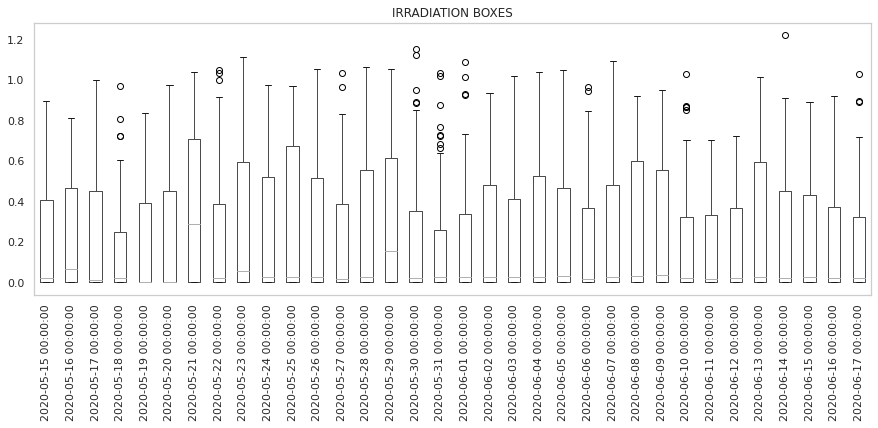

In [61]:
irra.boxplot(figsize=(15,5), rot = 90, grid=False)
plt.title('IRRADIATION BOXES')

In [62]:
rad = plant1_sensor.groupby('date')['IRRADIATION'].agg('sum')

Text(0.5, 1.0, 'IRRADIATION 15 MAY- 17 JUNE')

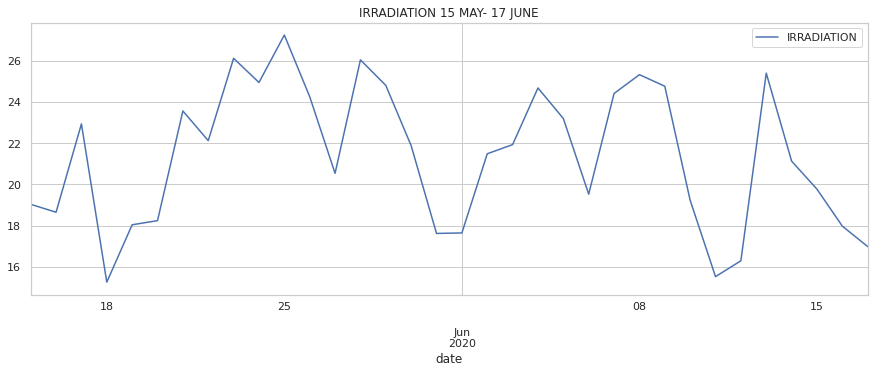

In [63]:
rad.plot(grid=True, figsize=(15,5), legend=True)
plt.title('IRRADIATION 15 MAY- 17 JUNE')

**N.B** Thursday 21 May 2020 is a date where plant 1 are:

1. more produce dc power.

2. ambient temperature, module temperature are maximun.

This date is very special.

# Correlation

In this part, we are making correlation between feature to see how some feature can explain another feature. or see relation between them.

In [64]:
# we are merge our solar power generation data and weather sensor data
power_sensor = plant1_sensor.merge(plant1_data, left_on='DATE_TIME', right_on='DATE_TIME')

In [65]:
power_sensor.tail(3)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION     date_x    time_x  DC_POWER  AC_POWER    DAILY_YIELD  \
2099          0.0 2020-06-17  23:15:00       0.0       0.0  129571.000000   
2100          0.0 2020-06-17  23:30:00       0.0       0.0  129571.000000   
2101          0.0 2020-06-17  23:45:00       0.0       0.0  127962.767857   

      TOTAL_YIELD    time_y     date_y  
2099  156142755.0  23:15:00 2020-06-17  
2100  156142755.0  23:30:00 2020-06-17  
2101  156142755.0  23:45:00 2020-06-17

In [66]:
#we remove the columns that we do not need
del power_sensor['date_x']
del power_sensor['date_y']
del power_sensor['time_x']
del power_sensor['time_y']

In [67]:
power_sensor.tail(3)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  
2099          0.0       0.0       0.0  129571.000000  156142755.0  
2100          0.0       0.0       0.0  129571.000000  156142755.0  
2101          0.0       0.0       0.0  127962.767857  156142755.0

In [68]:
power_sensor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            2102 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  2102 non-null   float64       
 2   MODULE_TEMPERATURE   2102 non-null   float64       
 3   IRRADIATION          2102 non-null   float64       
 4   DC_POWER             2102 non-null   float64       
 5   AC_POWER             2102 non-null   float64       
 6   DAILY_YIELD          2102 non-null   float64       
 7   TOTAL_YIELD          2102 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 147.8 KB


In [69]:
#we start correlation
power_sensor.corr(method = 'spearman')

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
AMBIENT_TEMPERATURE             1.000000            0.904966     0.727792   
MODULE_TEMPERATURE              0.904966            1.000000     0.898463   
IRRADIATION                     0.727792            0.898463     1.000000   
DC_POWER                        0.726844            0.899742     0.991862   
AC_POWER                        0.726807            0.899723     0.991859   
DAILY_YIELD                     0.561756            0.395577     0.214140   
TOTAL_YIELD                    -0.145263           -0.037379     0.019198   

                     DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  
AMBIENT_TEMPERATURE  0.726844  0.726807     0.561756    -0.145263  
MODULE_TEMPERATURE   0.899742  0.899723     0.395577    -0.037379  
IRRADIATION          0.991862  0.991859     0.214140     0.019198  
DC_POWER             1.000000  1.000000     0.215899     0.028539  
AC_POWER             1.000000  1.000000     0.215875     0.028532  
DAILY_YIELD          0.215899  0.215875     1.000000     0.041595  
TOTAL_YIELD          0.028539  0.028532     0.041595     1.000000

**Comment**

``DAILY_YIELD`` is not correlated with all feature but  ``AMBIENT_TEMPERATURE`` is moreless correlated.

``TOTAL_YIELD`` is also not correlated with all feature. I remove it in the correlation matrix. 

In [70]:
corr = power_sensor.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']).corr(method = 'spearman')

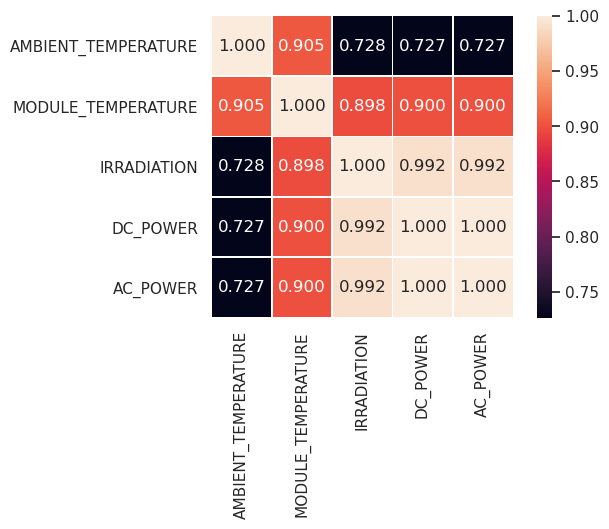

In [71]:
plt.figure(dpi=100)
sns.heatmap(corr, robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)
plt.show()

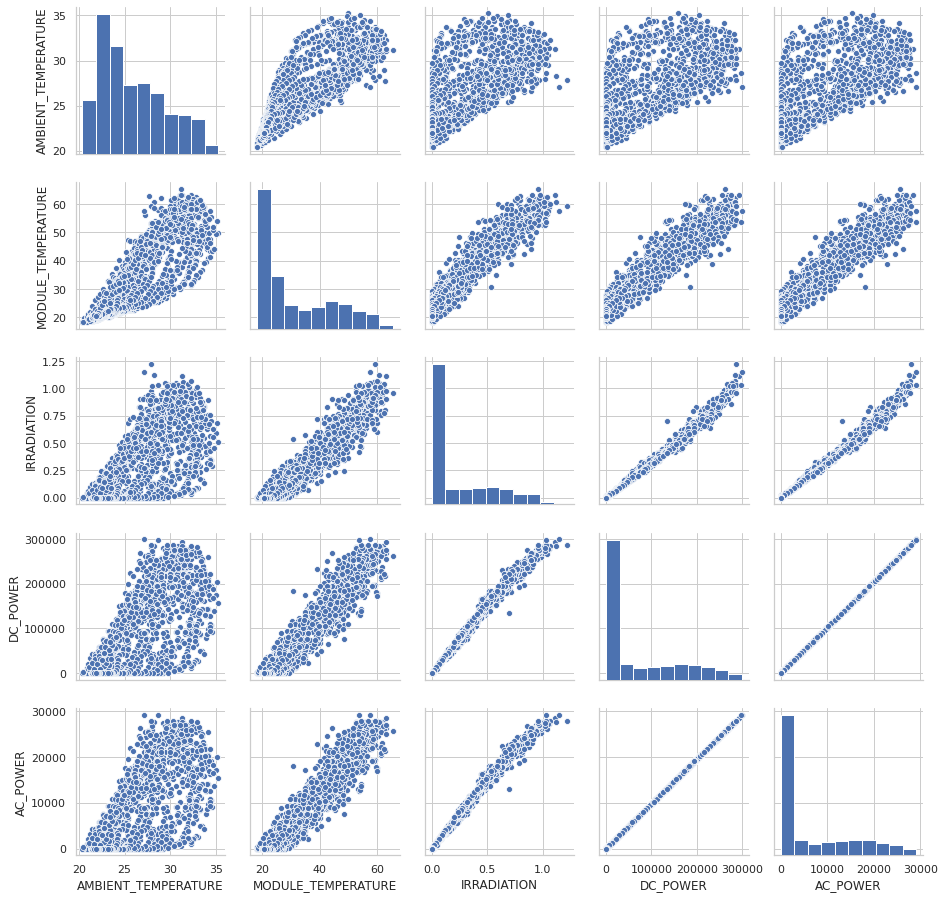

In [72]:
# we make pairplot
sns.pairplot(power_sensor.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']))
plt.show()

In [73]:
#we plot dc power vs ac power

<Figure size 600x400 with 0 Axes>

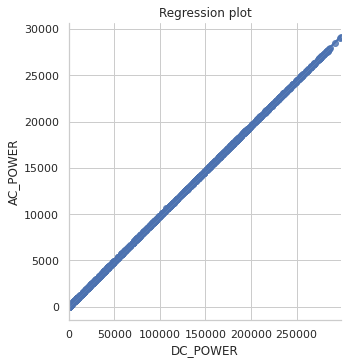

In [74]:
plt.figure(dpi=100)
sns.lmplot(x='DC_POWER', y='AC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()

**Comment**

This graph said that inverter convert dc power to ac power linearly. $dc power = 10*ac power$ inverter lost 90% of their power when it convert. 

<Figure size 600x400 with 0 Axes>

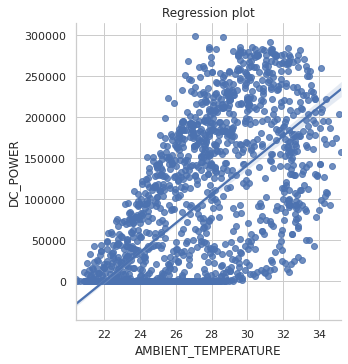

In [75]:
plt.figure(dpi=100)
sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()

**comment**

DC_power increases non linearly with an Ambient_Temperature.

<Figure size 600x400 with 0 Axes>

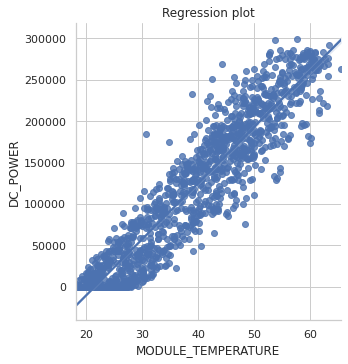

In [76]:
plt.figure(dpi=100)
sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()

**comment**

``DC_POWER`` is produced linearly by ``MODULE_TEMPERATURE`` with some variability. 

<Figure size 600x400 with 0 Axes>

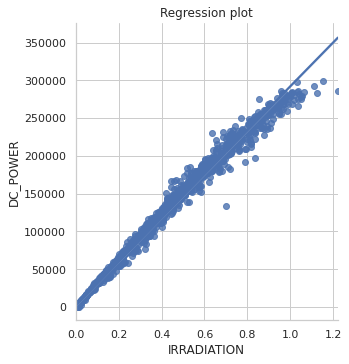

In [77]:
plt.figure(dpi=100)
sns.lmplot(x='IRRADIATION', y='DC_POWER', data=power_sensor)
plt.title('Regression plot')
plt.show()

**Comment**

DC_Power increase with IRRADIATION.

What happens if I introuduce a difference Temperature between ``AMBIENT_TEMPERATURE`` AND ``MODULE_TEMPERATURE``.

In [78]:
# we introduce DELTA_TEMPERATURE
power_sensor['DELTA_TEMPERATURE'] = abs(power_sensor.AMBIENT_TEMPERATURE - power_sensor.MODULE_TEMPERATURE)

In [79]:
# we check if all is ok
power_sensor.tail(3)

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
2099 2020-06-17 23:15:00            22.008275           20.709211   
2100 2020-06-17 23:30:00            21.969495           20.734963   
2101 2020-06-17 23:45:00            21.909288           20.427972   

      IRRADIATION  DC_POWER  AC_POWER    DAILY_YIELD  TOTAL_YIELD  \
2099          0.0       0.0       0.0  129571.000000  156142755.0   
2100          0.0       0.0       0.0  129571.000000  156142755.0   
2101          0.0       0.0       0.0  127962.767857  156142755.0   

      DELTA_TEMPERATURE  
2099           1.299063  
2100           1.234532  
2101           1.481315

In [80]:
#now we use correlation
power_sensor.corr(method='spearman')['DELTA_TEMPERATURE']

AMBIENT_TEMPERATURE    0.661651
MODULE_TEMPERATURE     0.750403
IRRADIATION            0.795925
DC_POWER               0.804256
AC_POWER               0.804242
DAILY_YIELD            0.175267
TOTAL_YIELD           -0.044634
DELTA_TEMPERATURE      1.000000
Name: DELTA_TEMPERATURE, dtype: float64

**comment**

we remark that YIELD does not depend on ``DELTA_TEMPERATURE`` also.

Text(0.5, 1.0, 'correlation between DC_POWER and DELTA_TEMPERATURE')

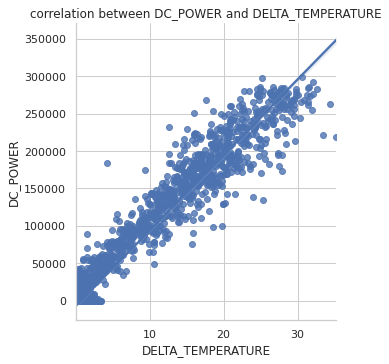

In [81]:
sns.lmplot(x='DELTA_TEMPERATURE', y='DC_POWER', data=power_sensor)
plt.title('correlation between DC_POWER and DELTA_TEMPERATURE')

**comment**

We know that $\dot Q \propto \Delta T$.So, we could say that ``DC_POWER`` is influenced by heat transfer.

Text(0.5, 1.0, 'Regression plot')

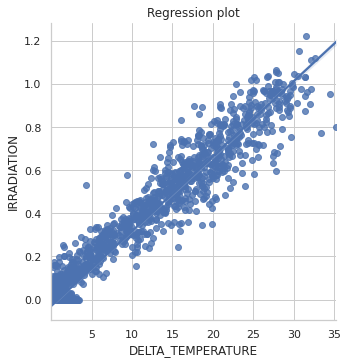

In [82]:
sns.lmplot(x='DELTA_TEMPERATURE', y='IRRADIATION', data=power_sensor)
plt.title('Regression plot')

**comment**

``IRRADIATION`` of Module and Heat Transfert between ambient air and Module are very well correlated.

**short conclusion**

In this section, we conclude that:

1. Yield does not depend on the Temperature, the dc/ac power and irradiation.

2. the transfert function between dc and ac power is linear.

3. dc power is indeed influenced by the ambient temperature, by the temperature of the module, by the irradiation and finally by the heat transfer between the module and the air.

4. all 22 Inverters of Plant I lost 90% of their dc power when it convert.

## Comparison of two power plants

### Plant 1 data vs Plant2 data

In [83]:
file2 = '/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv'

In [84]:
plant2_data = pd.read_csv(file2)

In [85]:
plant2_data.head(3)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09

In [86]:
plant2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [87]:
#we compute a sum of 22 inverters
plant2_data = plant2_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()

In [88]:
plant2_data['DATE_TIME'] = pd.to_datetime(plant2_data['DATE_TIME'], errors='coerce')
plant2_data['time'] = plant2_data['DATE_TIME'].dt.time
plant2_data['date'] = pd.to_datetime(plant2_data['DATE_TIME'].dt.date)

In [89]:
plant2_data.tail(3)

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
3256 2020-06-17 23:15:00       0.0       0.0      93040.0  1.419408e+10   
3257 2020-06-17 23:30:00       0.0       0.0      93040.0  1.419408e+10   
3258 2020-06-17 23:45:00       0.0       0.0      93040.0  1.419408e+10   

          time       date  
3256  23:15:00 2020-06-17  
3257  23:30:00 2020-06-17  
3258  23:45:00 2020-06-17

In [90]:
plant2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3259 non-null   datetime64[ns]
 1   DC_POWER     3259 non-null   float64       
 2   AC_POWER     3259 non-null   float64       
 3   DAILY_YIELD  3259 non-null   float64       
 4   TOTAL_YIELD  3259 non-null   float64       
 5   time         3259 non-null   object        
 6   date         3259 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 178.4+ KB


Text(0, 0.5, 'Power (KW)')

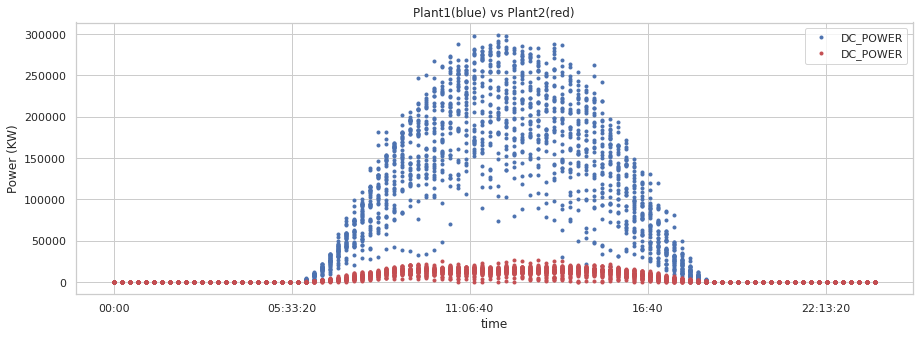

In [91]:
#we conpare a dc power of two plant
ax = plant1_data.plot(x='time', y='DC_POWER', figsize=(15,5), legend=True, style='b.')
plant2_data.plot(x='time', y='DC_POWER', legend=True, style='r.', ax=ax)
plt.title('Plant1(blue) vs Plant2(red)')
plt.ylabel('Power (KW)')

Plant 1 produces dc power 6 time than plant 2 in daily

Text(0, 0.5, 'Power (KW)')

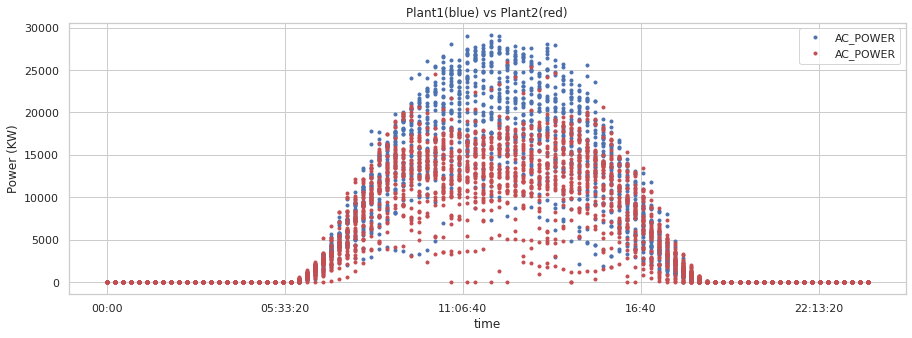

In [92]:
#we conpare a dc power of two plant
ax1 = plant1_data.plot(x='time', y='AC_POWER', figsize=(15,5), legend=True, style='b.', )
plant2_data.plot(x='time', y='AC_POWER', legend=True, style='r.', ax=ax1)
plt.title('Plant1(blue) vs Plant2(red)')
plt.ylabel('Power (KW)')

The two plants are almost the same ac power

In [93]:
p2_daily_dc = plant2_data.groupby('date')['DC_POWER'].agg('sum')

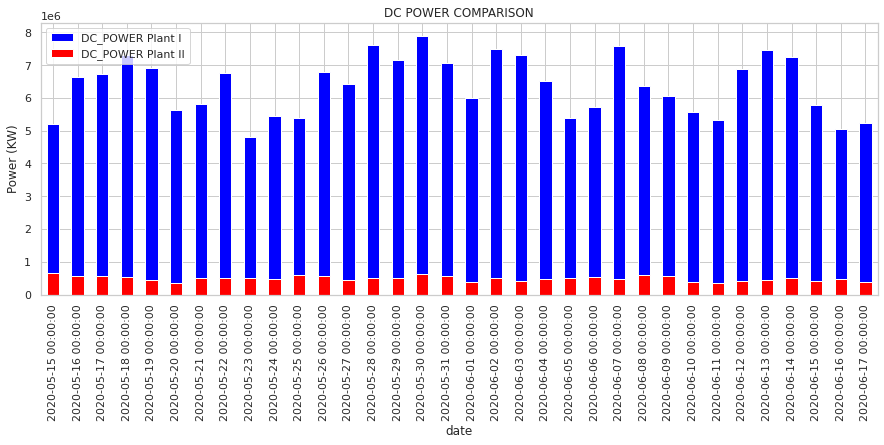

In [94]:
axh = daily_dc.plot.bar(legend=True, figsize=(15,5), color='Blue', label='DC_POWER Plant I')
p2_daily_dc.plot.bar(legend=True, color='Red', label='DC_POWER Plant II', stacked=False)
plt.title('DC POWER COMPARISON')
plt.ylabel('Power (KW)')
plt.show()

Each date plant1 is huge to produce a dc power but plant 2 reach almost 1 GW.

In [95]:
daily_ac = plant1_data.groupby('date')['AC_POWER'].agg('sum')
p2_daily_ac = plant2_data.groupby('date')['AC_POWER'].agg('sum')

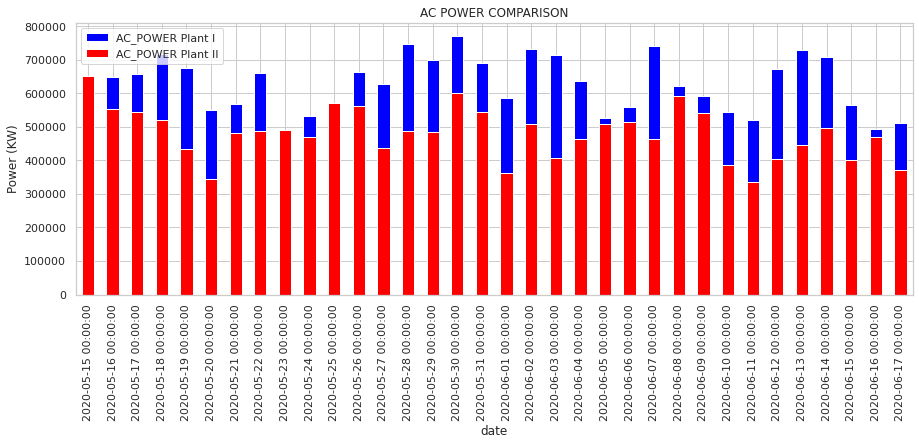

In [96]:
ac = daily_ac.plot.bar(legend=True, figsize=(15,5), color='Blue', label='AC_POWER Plant I')
p2_daily_ac.plot.bar(legend=True, color='Red', label='AC_POWER Plant II')
plt.title('AC POWER COMPARISON')
plt.ylabel('Power (KW)')
plt.show()

Plant I and Plant II are almost same to produce a ac power for each day.

In [97]:
#compute daily_yield for each date
p2_dyield = plant2_data.groupby('date')['DAILY_YIELD'].agg('sum')

Text(0.5, 1.0, 'DAILY YIELD COMPARISON')

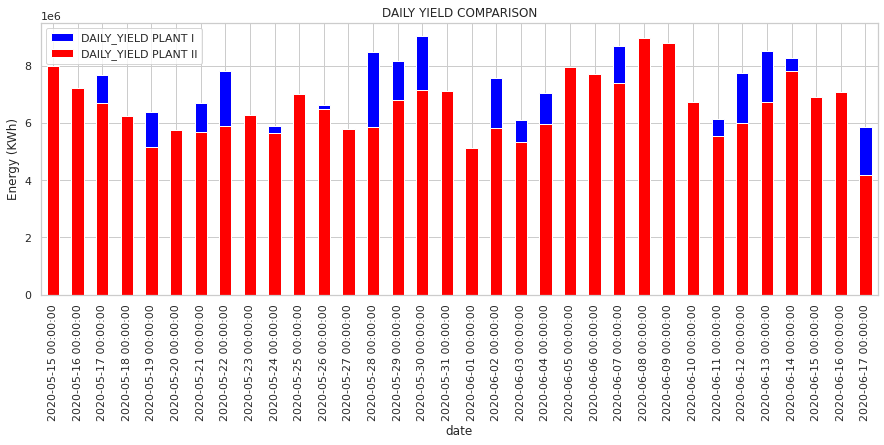

In [98]:
dy = dyield.plot.bar(figsize=(15,5), legend=True, label='DAILY_YIELD PLANT I', color='Blue')
p2_dyield.plot.bar(legend=True, label='DAILY_YIELD PLANT II', color='Red')
plt.ylabel('Energy (KWh)')
plt.title('DAILY YIELD COMPARISON')

Plant I and plant II have almost same daily yield but certain days, they are differents

In [99]:
#compute a average total_yield for plant I for each day
tyield = plant1_data.groupby('date')['TOTAL_YIELD'].agg('mean')

#compute a average total_yield for plant II for each day
p2_tyield = plant2_data.groupby('date')['TOTAL_YIELD'].agg('mean')

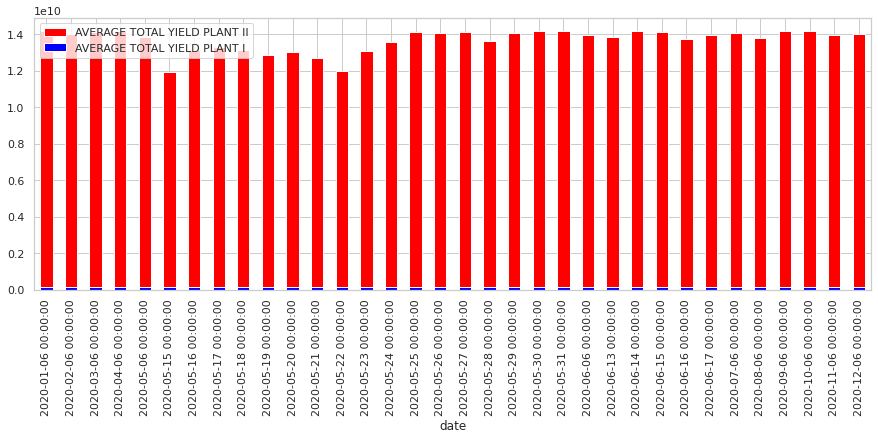

In [100]:
aver = p2_tyield.plot.bar(figsize=(15,5), legend=True, label='AVERAGE TOTAL YIELD PLANT II', color='Red')
tyield.plot.bar(legend=True, label='AVERAGE TOTAL YIELD PLANT I', color='Blue',ax=aver)

The gap between average total yield for plant II and average total yield for plant I for each date is very large. 

## Plant I weather sensor vs Plant II weather sensor

In [101]:
file3 = '/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv'

In [102]:
plant2_sensor = pd.read_csv(file3)

In [103]:
plant2_sensor.tail()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
3254  2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
3255  2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
3256  2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
3257  2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
3258  2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
3254           22.856201          0.0  
3255           22.744190          0.0  
3256           22.492245          0.0  
3257           22.373909          0.0  
3258           22.535908          0.0

In [104]:
plant2_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [105]:
plant2_sensor['DATE_TIME'] = pd.to_datetime(plant2_sensor['DATE_TIME'], errors='coerce')

In [106]:
# same work cleaning data for plant II
plant2_sensor['date'] = pd.to_datetime(pd.to_datetime(plant2_sensor['DATE_TIME']).dt.date)
plant2_sensor['time'] = pd.to_datetime(plant2_sensor['DATE_TIME']).dt.time


del plant2_sensor['PLANT_ID']
del plant2_sensor['SOURCE_KEY']

In [107]:
plant2_sensor.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0 2020-05-15 00:00:00            27.004764           25.060789          0.0   
1 2020-05-15 00:15:00            26.880811           24.421869          0.0   
2 2020-05-15 00:30:00            26.682055           24.427290          0.0   
3 2020-05-15 00:45:00            26.500589           24.420678          0.0   
4 2020-05-15 01:00:00            26.596148           25.088210          0.0   

        date      time  
0 2020-05-15  00:00:00  
1 2020-05-15  00:15:00  
2 2020-05-15  00:30:00  
3 2020-05-15  00:45:00  
4 2020-05-15  01:00:00

Text(0, 0.5, 'Temperature (°C)')

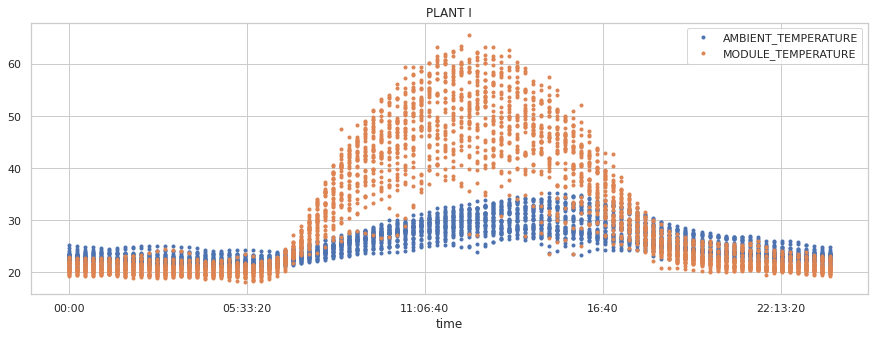

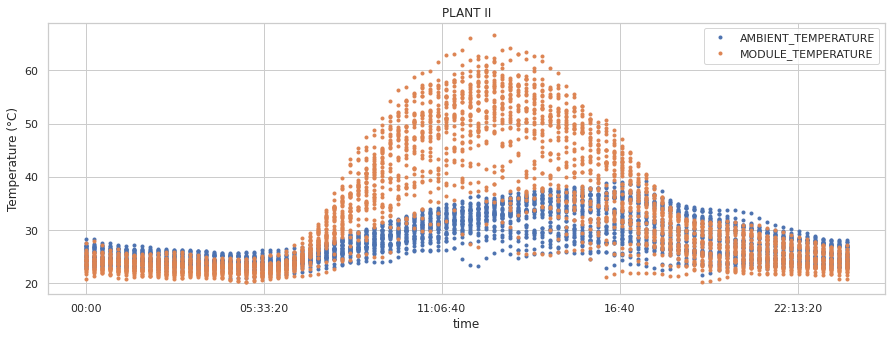

In [108]:
plant1_sensor[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','time']].plot(x='time', label='Plant I', title='PLANT I', figsize=(15,5), style='.')
plant2_sensor[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','time']].plot(x='time', label='Plant II', title='PLANT II', figsize=(15,5), style='.')
plt.ylabel('Temperature (°C)')

Text(0.5, 1.0, 'IRRADIATION COMPARISON')

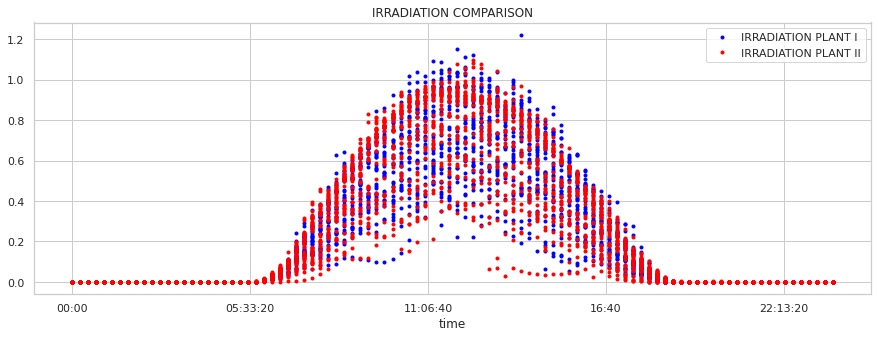

In [109]:
#compare IRRADIATION PLANT I VS PLANT II
aq = plant1_sensor.plot(x='time', y='IRRADIATION', legend=True, label='IRRADIATION PLANT I', color='Blue', style='.', figsize=(15,5))
plant2_sensor.plot(x='time', y='IRRADIATION', legend=True, label='IRRADIATION PLANT II',  color='Red', style='.', ax=aq)
plt.title('IRRADIATION COMPARISON')

Plant I and Plant II have same  IRRADIATION  distribution between 05:33:20 and 18:00:00

## correlation for PLANT II

In [110]:
# we are merging our solar power generation data and weather sensor data for plant 2
sensorData = plant2_sensor.merge(plant2_data, left_on='DATE_TIME', right_on='DATE_TIME')

In [111]:
#we remove the columns that we do not need
del sensorData['date_x']
del sensorData['date_y']
del sensorData['time_x']
del sensorData['time_y']

In [112]:
sensorData.tail()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
3254 2020-06-17 22:45:00            23.511703           22.856201   
3255 2020-06-17 23:00:00            23.482282           22.744190   
3256 2020-06-17 23:15:00            23.354743           22.492245   
3257 2020-06-17 23:30:00            23.291048           22.373909   
3258 2020-06-17 23:45:00            23.202871           22.535908   

      IRRADIATION  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  
3254          0.0       0.0       0.0      93040.0  1.419408e+10  
3255          0.0       0.0       0.0      93040.0  1.419408e+10  
3256          0.0       0.0       0.0      93040.0  1.419408e+10  
3257          0.0       0.0       0.0      93040.0  1.419408e+10  
3258          0.0       0.0       0.0      93040.0  1.419408e+10

I create five new feature DELTA_TEMPERATURE, NEW_DAILY_YIELD, NEW_TOTAL_YIELD, NEW_AMBIENT_TEMPERATURE and NEW_MODULE_TEMPERATURE.

delta temperature = ambient temperature - module temperature. All other new variable is just the first derivative in time.

1. New daily yield is the next daily yield - previous daily yield.
2. new total yield is the next total yield - previous total yield
3. new ambient temperature is the next ambient temperature - previous ambient temperature.

and so on, do not forget that it is after 15 min of each daily 

In [113]:
sensorData = sensorData.assign(DELTA_TEMPERATURE = abs(sensorData.MODULE_TEMPERATURE - sensorData.AMBIENT_TEMPERATURE),
                              NEW_DAILY_YIELD = sensorData.DAILY_YIELD.diff(),
                              NEW_TOTAL_YIELD = sensorData.TOTAL_YIELD.diff(),
                              NEW_AMBIENT_TEMPERATURE = sensorData.AMBIENT_TEMPERATURE.diff(),
                              NEW_MODULE_TEMPERATURE = sensorData.MODULE_TEMPERATURE.diff(),
                              NEW_AC_POWER = sensorData.AC_POWER.diff())

In [114]:
#see
sensorData.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0 2020-05-15 00:00:00            27.004764           25.060789          0.0   
1 2020-05-15 00:15:00            26.880811           24.421869          0.0   
2 2020-05-15 00:30:00            26.682055           24.427290          0.0   
3 2020-05-15 00:45:00            26.500589           24.420678          0.0   
4 2020-05-15 01:00:00            26.596148           25.088210          0.0   

   DC_POWER  AC_POWER   DAILY_YIELD   TOTAL_YIELD  DELTA_TEMPERATURE  \
0       0.0       0.0  48899.938095  1.418960e+10           1.943975   
1       0.0       0.0  28401.000000  1.418960e+10           2.458943   
2       0.0       0.0  28401.000000  1.418960e+10           2.254765   
3       0.0       0.0  28401.000000  1.418960e+10           2.079911   
4       0.0       0.0  26516.000000  1.418960e+10           1.507938   

   NEW_DAILY_YIELD  NEW_TOTAL_YIELD  NEW_AMBIENT_TEMPERATURE  \
0              NaN              NaN                      NaN   
1    -20498.938095              0.0                -0.123952   
2         0.000000              0.0                -0.198756   
3         0.000000              0.0                -0.181466   
4     -1885.000000              0.0                 0.095559   

   NEW_MODULE_TEMPERATURE  NEW_AC_POWER  
0                     NaN           NaN  
1               -0.638920           0.0  
2                0.005421           0.0  
3               -0.006613           0.0  
4                0.667533           0.0

In [115]:
sensorData.corr(method='spearman').style.background_gradient('viridis')

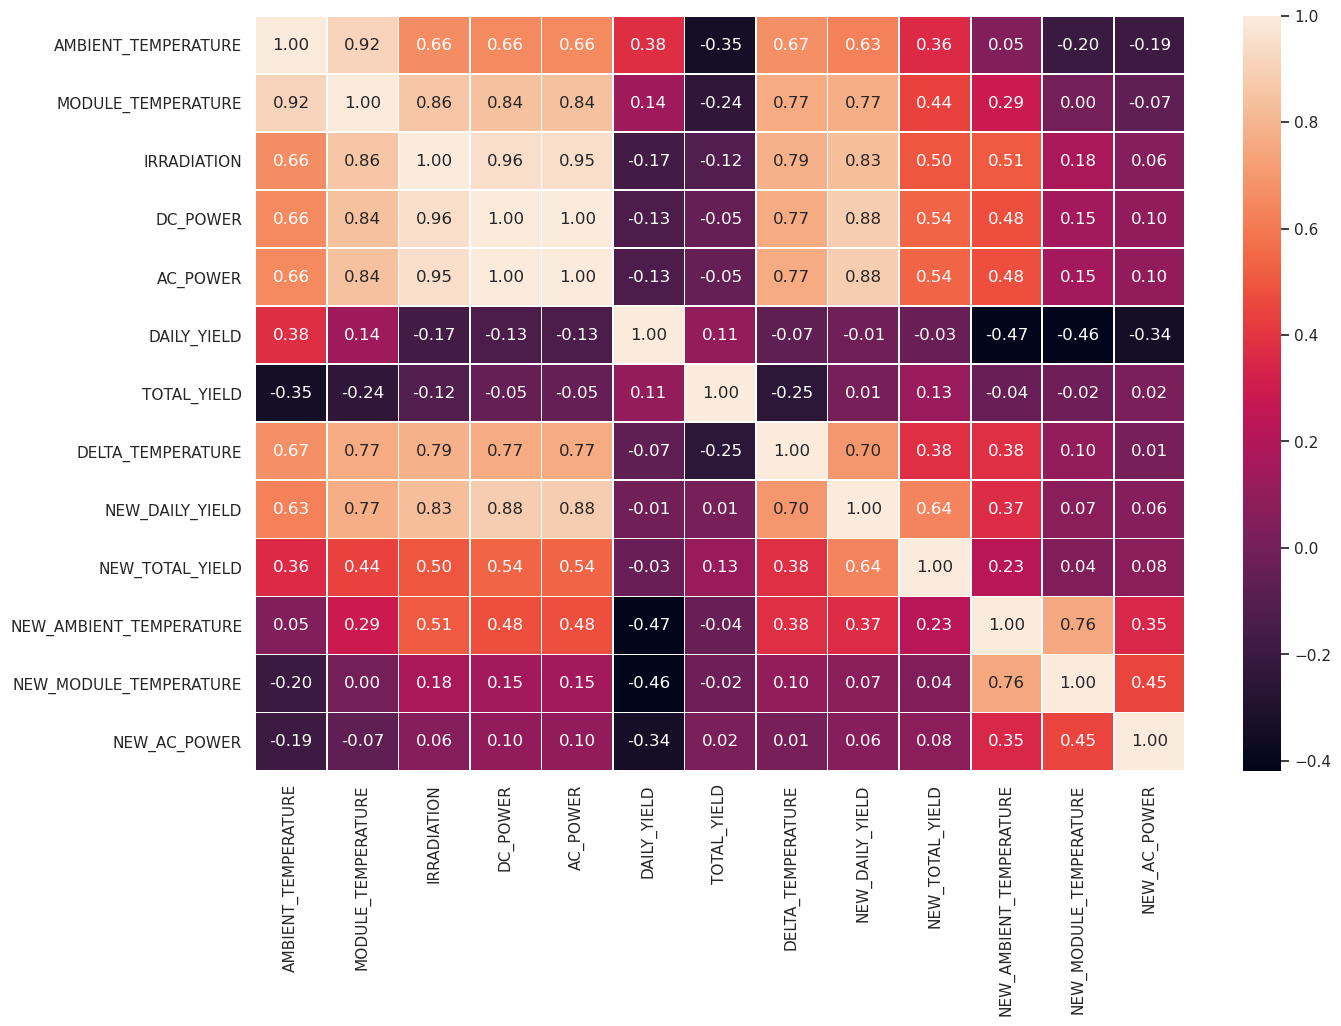

In [116]:
plt.figure(dpi=100, figsize=(15,10))
sns.heatmap(sensorData.corr(method='spearman'), robust=True, annot=True, fmt='0.2f', linewidths=.5, square=False)
plt.show()

In plant II, ``TOTAL_YIELD`` is opposite with all feature except ``DAILY_YIELD``.

Text(0.5, 1.0, 'Regression plot')

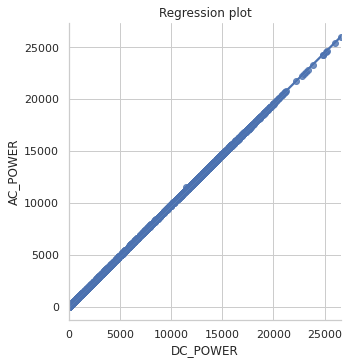

In [117]:
#we plot ac vs dc power
sns.lmplot(x='DC_POWER', y='AC_POWER', data=sensorData)
plt.title('Regression plot')

In plant two, dc power = ac power, Inverter lost 0% of the power.

Text(0.5, 1.0, 'Regression plot')

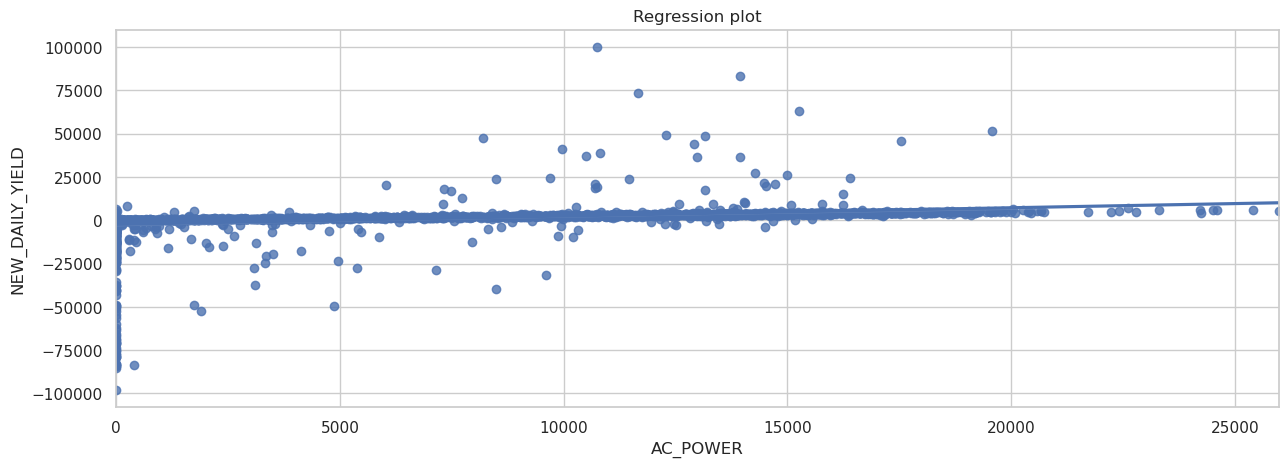

In [118]:
#we plot New DAILY YIELD vs ac power
plt.figure(dpi=(100), figsize=(15,5))
sns.regplot(x='AC_POWER', y='NEW_DAILY_YIELD', data=sensorData)
plt.title('Regression plot')

**We learn**

1. AC_POWER < 5000 KW, the NEW_DAILY_YIELD is negative.
2. AC_POWER between 5000 KW and 12000 KW, NEW_DAILY_YIELD is both positive and negative
3. AC_POWER > 12000 KW is positive.

Text(0.5, 1.0, 'Regression plot')

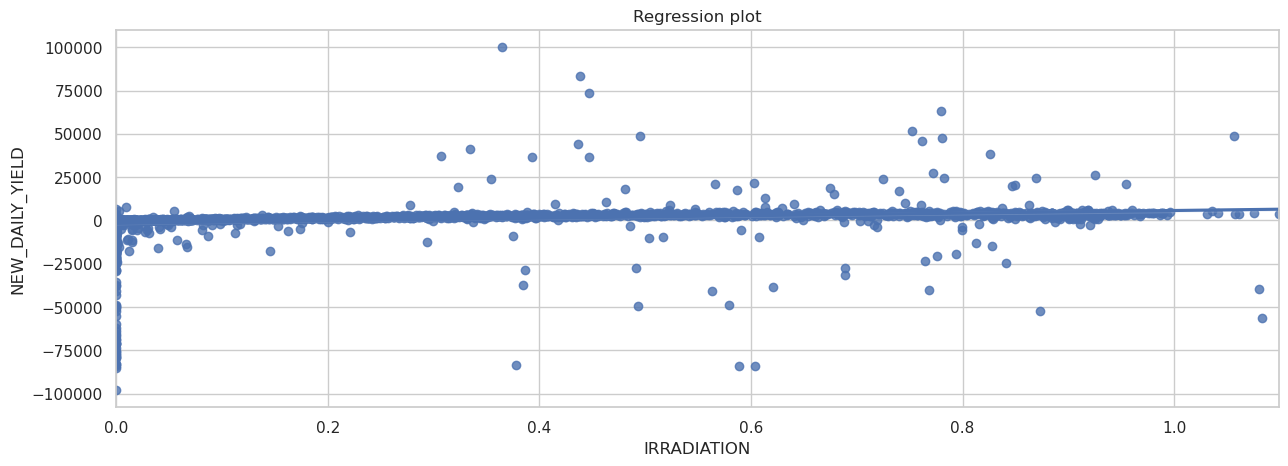

In [119]:
#we plot New DAILY YIELD vs IRRADIATION
plt.figure(dpi=(100), figsize=(15,5))
sns.regplot(x='IRRADIATION', y='NEW_DAILY_YIELD', data=sensorData)
plt.title('Regression plot')

**We learn**

NEW_DAILY_YIELD are positive and negative along the variation of irradiation

Text(0.5, 1.0, 'Regression plot')

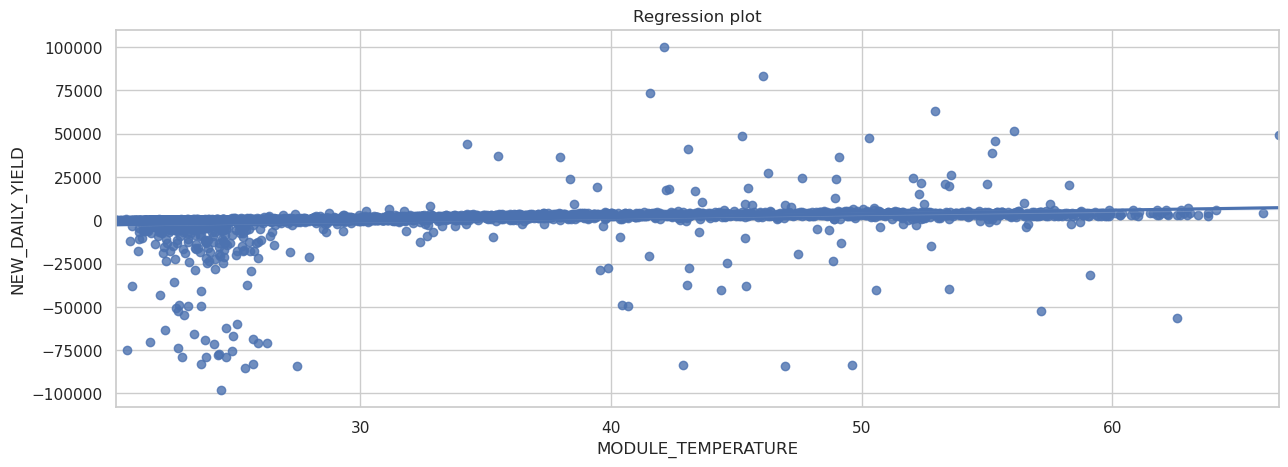

In [120]:
#we plot New DAILY YIELD vs ac power
plt.figure(dpi=(100), figsize=(15,5))
sns.regplot(x='MODULE_TEMPERATURE', y='NEW_DAILY_YIELD', data=sensorData)
plt.title('Regression plot')

**We learn**

for MODULE_TEMPERATURE < 30°C, NEW_DAILY_TEMPERATURE is negative. This means that PV panel product the energy if temperature is around 35°C. 

Text(0.5, 1.0, 'Regression plot')

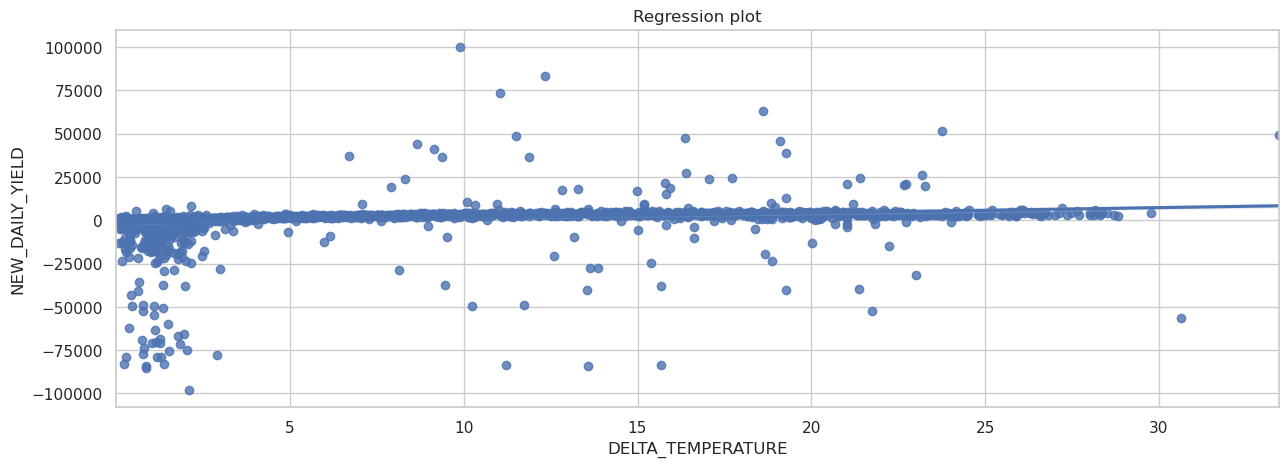

In [121]:
#we plot New DAILY YIELD vs DELTA TEMPERATURE
plt.figure(dpi=(100), figsize=(15,5))
sns.regplot(x='DELTA_TEMPERATURE', y='NEW_DAILY_YIELD', data=sensorData)
plt.title('Regression plot')

**We learn**

NEW_DAILY_YIELD is only negative if DELTA_TEMPERATURE < 5°C. This means that daily yield decrease every 15min if the difference temperature between ambient and module temperature is less than 5°C.

Text(0.5, 1.0, 'Regression plot')

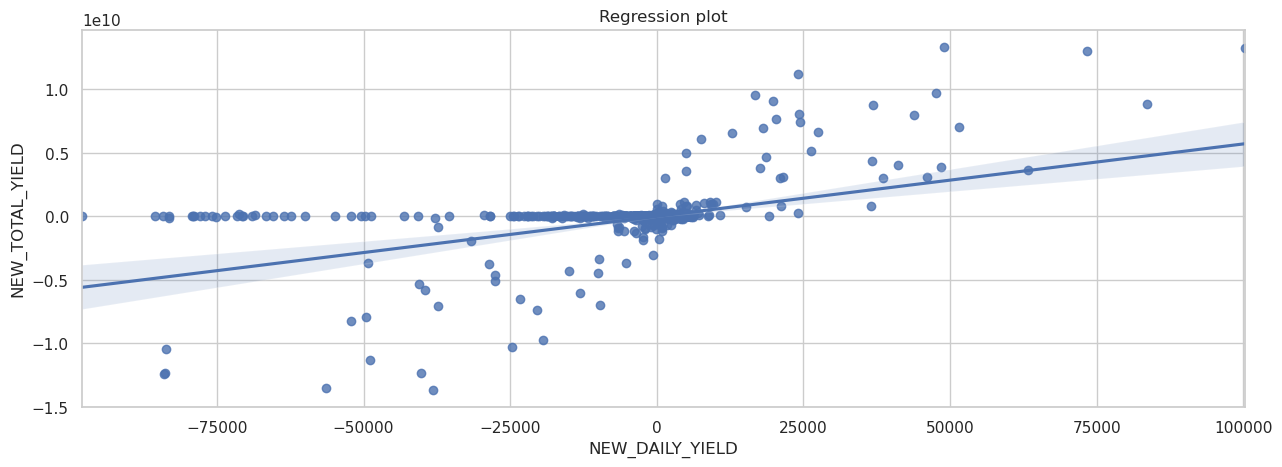

In [122]:
#we plot New TOTAL YIELD vs New daily yield
plt.figure(dpi=(100), figsize=(15,5))
sns.regplot(y='NEW_TOTAL_YIELD', x='NEW_DAILY_YIELD', data=sensorData)
plt.title('Regression plot')

Text(0.5, 1.0, 'Regression plot')

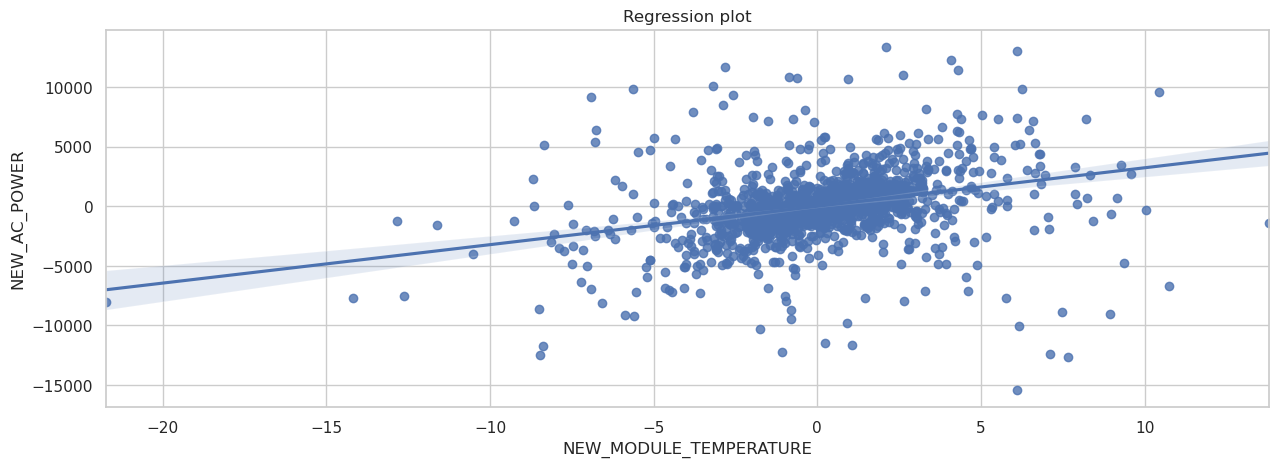

In [123]:
#we plot New TOTAL YIELD vs New daily yield
plt.figure(dpi=(100), figsize=(15,5))
sns.regplot(y='NEW_AC_POWER', x='NEW_MODULE_TEMPERATURE', data=sensorData)
plt.title('Regression plot')

New AC Power is the change of previous and next AC Power produced in the time. We have more AC Power only if New Module Temperature is between -5 and 5. 

**We learn**

1. New daily yield decrease total yield decrease. new daily yield increase, new total yield increase. 
2. new daily yield is zeros, new total yield is zeros

**General Conclusion**

throughout this notebook, we can say that
1. plant I produces 6 times more DC power than plant II. And loses 90% of it when converting to AC power.
2. While Plant II loses nothing when converting DC power to AC power.

3. AC power output is almost the same for both plants.

4. The daily yield is almost the same for the two plants.

5. The gap between The average total yield for plant I and plant II is very large. 

6. Daily yield decrease if delta temperature is less than 5°C.

7. Daily yield decrease for some value of AC power.

END.

**Be free to comment, share and download, give your opinion for this work. Thanks**